Flourishing in the Workplace – An exploration

A company wishes to study the work-life balance of its employees. To do so, they have collected data from 248 employees. You are in charge of analyzing those data and to make a written report on your conclusions, as well as of making recommendations if appropriate.

1.	The data are available in an Excel file named « Base_248_HD.xlsx »
The variables of this dataset are the following:

a.	ID : identification number of the respondent (a number)

b.	Sex : the gender of the respondent

-	The value 1 indicates a male

-	The value 2 indicates a female

c.	famstatus : the family status of the respondent

-	1 : Single

-	2 : Separate / Divorced

-	3 : Couple

d.	education : The educational level of the respondent

-	1 : Has not completed high school degree

-	2 : Has completed only a high school degree

-	3 : Has completed up to 2 years after high school degree

-	4 : Has completed up to 3 years after high school degree

-	5 : Has completed up to 4 years after high school degree

-	6 : Has completed 5 years after high school degree or more

e.	age : age of the respondent

f.	prof_cat : the flourishing state of the respondent in an occupational context

-	Languishing (value = 1)

-	Moderately Mentally Healthy (value = 2)

-	Flourishing (value = 3)

g.	priv_cat : the flourishing state of the respondent in a private context

-	Languishing (value = 1)

-	Moderately Mentally Healthy (value = 2)

-	Flourishing (value = 3)

h.	positivity : the positivity ratio value, i.e., the ratio between the average positive emotions, over the average negative emotions

-	If the ratio is lesser than 1, the individual is diagnosed as depressed

-	If the ratio is between 1 and 2, the individual is languishing

-	If the ratio is between 2 and 3, the individual is moderately emotionally healthy

-	If the ratio is greater than 3, the individual is emotionally flourishing

i.	prof_quant : the total score of the respondent’s mental flourishing in a professional context

j.	priv_quant : the total score of the respondent’s mental flourishing in a private context

k.	flow : the Flow score of the respondent, measured as performance, mastery and focus

 
What is Statistical Learning?

In Data Science before you do anything you first start by exploring your dataset. The basic steps in data exploration are following:

In [1]:
import os 
import sys 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats.stats import pearsonr
# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")

C:\Users\ZH\AppData\Local\Temp\ipykernel_4004\1326222091.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
df_ogn = pd.read_excel("data/Flourishing_248_HD - Copy.xlsx")
df_ogn.isnull().sum()

ID            0
age           0
education     0
sex           0
famstatus     0
pro_cat       0
pro_quant     0
priv_cat      0
priv_quant    0
positivity    0
flow          0
dtype: int64

In [3]:
# display(df.head(3))
# var_cat = df.columns[[0,3,4,5,7]] 
# for inx in var_cat:
#     df[idx]=df[idx].astype('category')

# df['ID'].unique()
df = df_ogn.copy()
df.nunique()
# df_recoded['sex'].replace({1:'male',2:'female'},inplace=True)

ID            248
age            44
education       6
sex             2
famstatus       3
pro_cat         3
pro_quant      58
priv_cat        3
priv_quant     52
positivity    192
flow           33
dtype: int64

# Step 1 - Univariate Data Analysis

## If the variables are categorical.

### Generate the summary table of each variable.

In [4]:
def replace_sex(value):
    if value == 1 :
        return 'Male'
    else:
        return 'Female'
    
def replace_education(value):
    if value == 1 :
        return 'No high school'
    if value == 2 :
        return 'Only high school'
    if value == 3 :
        return '2Y after high school'
    if value == 4 :
        return '3Y after high school'
    if value == 5 :
        return '4Y after high school'
    else:
        return '5Y after high school'
    
def replace_famstatus(value):
    if value == 1 :
        return 'Single'
    if value == 2 :
        return 'Separate / Divorced'
    else:
        return 'Couple'
    
def replace_pro_cat(value):
    if value == 1 :
        return 'Languishing'
    if value == 2 :
        return 'Moderately Mentally Healthy'
    else:
        return 'Flourishing'
    
def replace_priv_cat(value):
    if value == 1 :
        return 'Languishing'
    if value == 2 :
        return 'Moderately Mentally Healthy'
    else:
        return 'Flourishing'
    
def new_positivity(value):
    if value < 1 :
        return 'Depressed'
    if value >=1 and value < 2:
        return 'Languishing'
    if value >=2 and value < 3:
        return 'Moderately Mentally Healthy'
    else:
        return 'Flourishing'

    
# 
df['sex'] = df['sex'].apply(replace_sex)
df['education'] = df['education'].apply(replace_education)
df['famstatus'] = df['famstatus'].apply(replace_famstatus)
df['pro_cat'] = df['pro_cat'].apply(replace_pro_cat)
df['priv_cat'] = df['priv_cat'].apply(replace_priv_cat)
df['new_positivity'] = df['positivity'].apply(lambda x : new_positivity(x)) 

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              248 non-null    int64  
 1   age             248 non-null    int64  
 2   education       248 non-null    object 
 3   sex             248 non-null    object 
 4   famstatus       248 non-null    object 
 5   pro_cat         248 non-null    object 
 6   pro_quant       248 non-null    int64  
 7   priv_cat        248 non-null    object 
 8   priv_quant      248 non-null    int64  
 9   positivity      248 non-null    float64
 10  flow            248 non-null    int64  
 11  new_positivity  248 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 23.4+ KB


,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,new_positivity
0,344,72,5Y after high school,Female,Separate / Divorced,Flourishing,82,Flourishing,83,4.142857,44,Flourishing
1,317,45,5Y after high school,Female,Separate / Divorced,Flourishing,81,Flourishing,83,4.000000,44,Flourishing
2,444,43,4Y after high school,Male,Single,Flourishing,79,Flourishing,78,5.000000,47,Flourishing
3,270,60,Only high school,Female,Couple,Flourishing,79,Flourishing,82,4.666667,42,Flourishing
4,52,49,Only high school,Female,Separate / Divorced,Flourishing,77,Flourishing,73,2.285714,33,Moderately Mentally Healthy


In [5]:
print("----------------Generate the summary table for quantitative variables----------------------")
df.iloc[:,1:].describe()

----------------Generate the summary table for quantitative variables----------------------


,age,pro_quant,priv_quant,positivity,flow
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,41.685484,50.612903,55.987903,1.812982,32.951613
std,10.154568,13.431614,11.613367,0.803469,6.599417
min,20.000000,21.000000,23.000000,0.384615,13.000000
25%,34.000000,41.000000,48.000000,1.272727,29.000000
50%,40.000000,50.000000,56.000000,1.720000,33.000000
75%,49.000000,61.000000,64.000000,2.170455,37.000000
max,72.000000,82.000000,83.000000,5.000000,48.000000


In [6]:
df_cat = df.select_dtypes(include=['object'])
df_cat.info()
print("----------------Generate the summary table for categorical variables----------------------")

for column_name in df_cat.columns:
    summary_table = pd.DataFrame(df_cat[column_name].value_counts(),index=df_cat[column_name].value_counts().index)
    print(f"{column_name}'s summary table:")
    print(summary_table) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   education       248 non-null    object
 1   sex             248 non-null    object
 2   famstatus       248 non-null    object
 3   pro_cat         248 non-null    object
 4   priv_cat        248 non-null    object
 5   new_positivity  248 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB
----------------Generate the summary table for categorical variables----------------------
education's summary table:
                      education
5Y after high school        110
4Y after high school         39
2Y after high school         39
3Y after high school         31
Only high school             20
No high school                9
sex's summary table:
        sex
Female  151
Male     97
famstatus's summary table:
                     famstatus
Couple                     173
Single         

### Plot their Pie Chart 

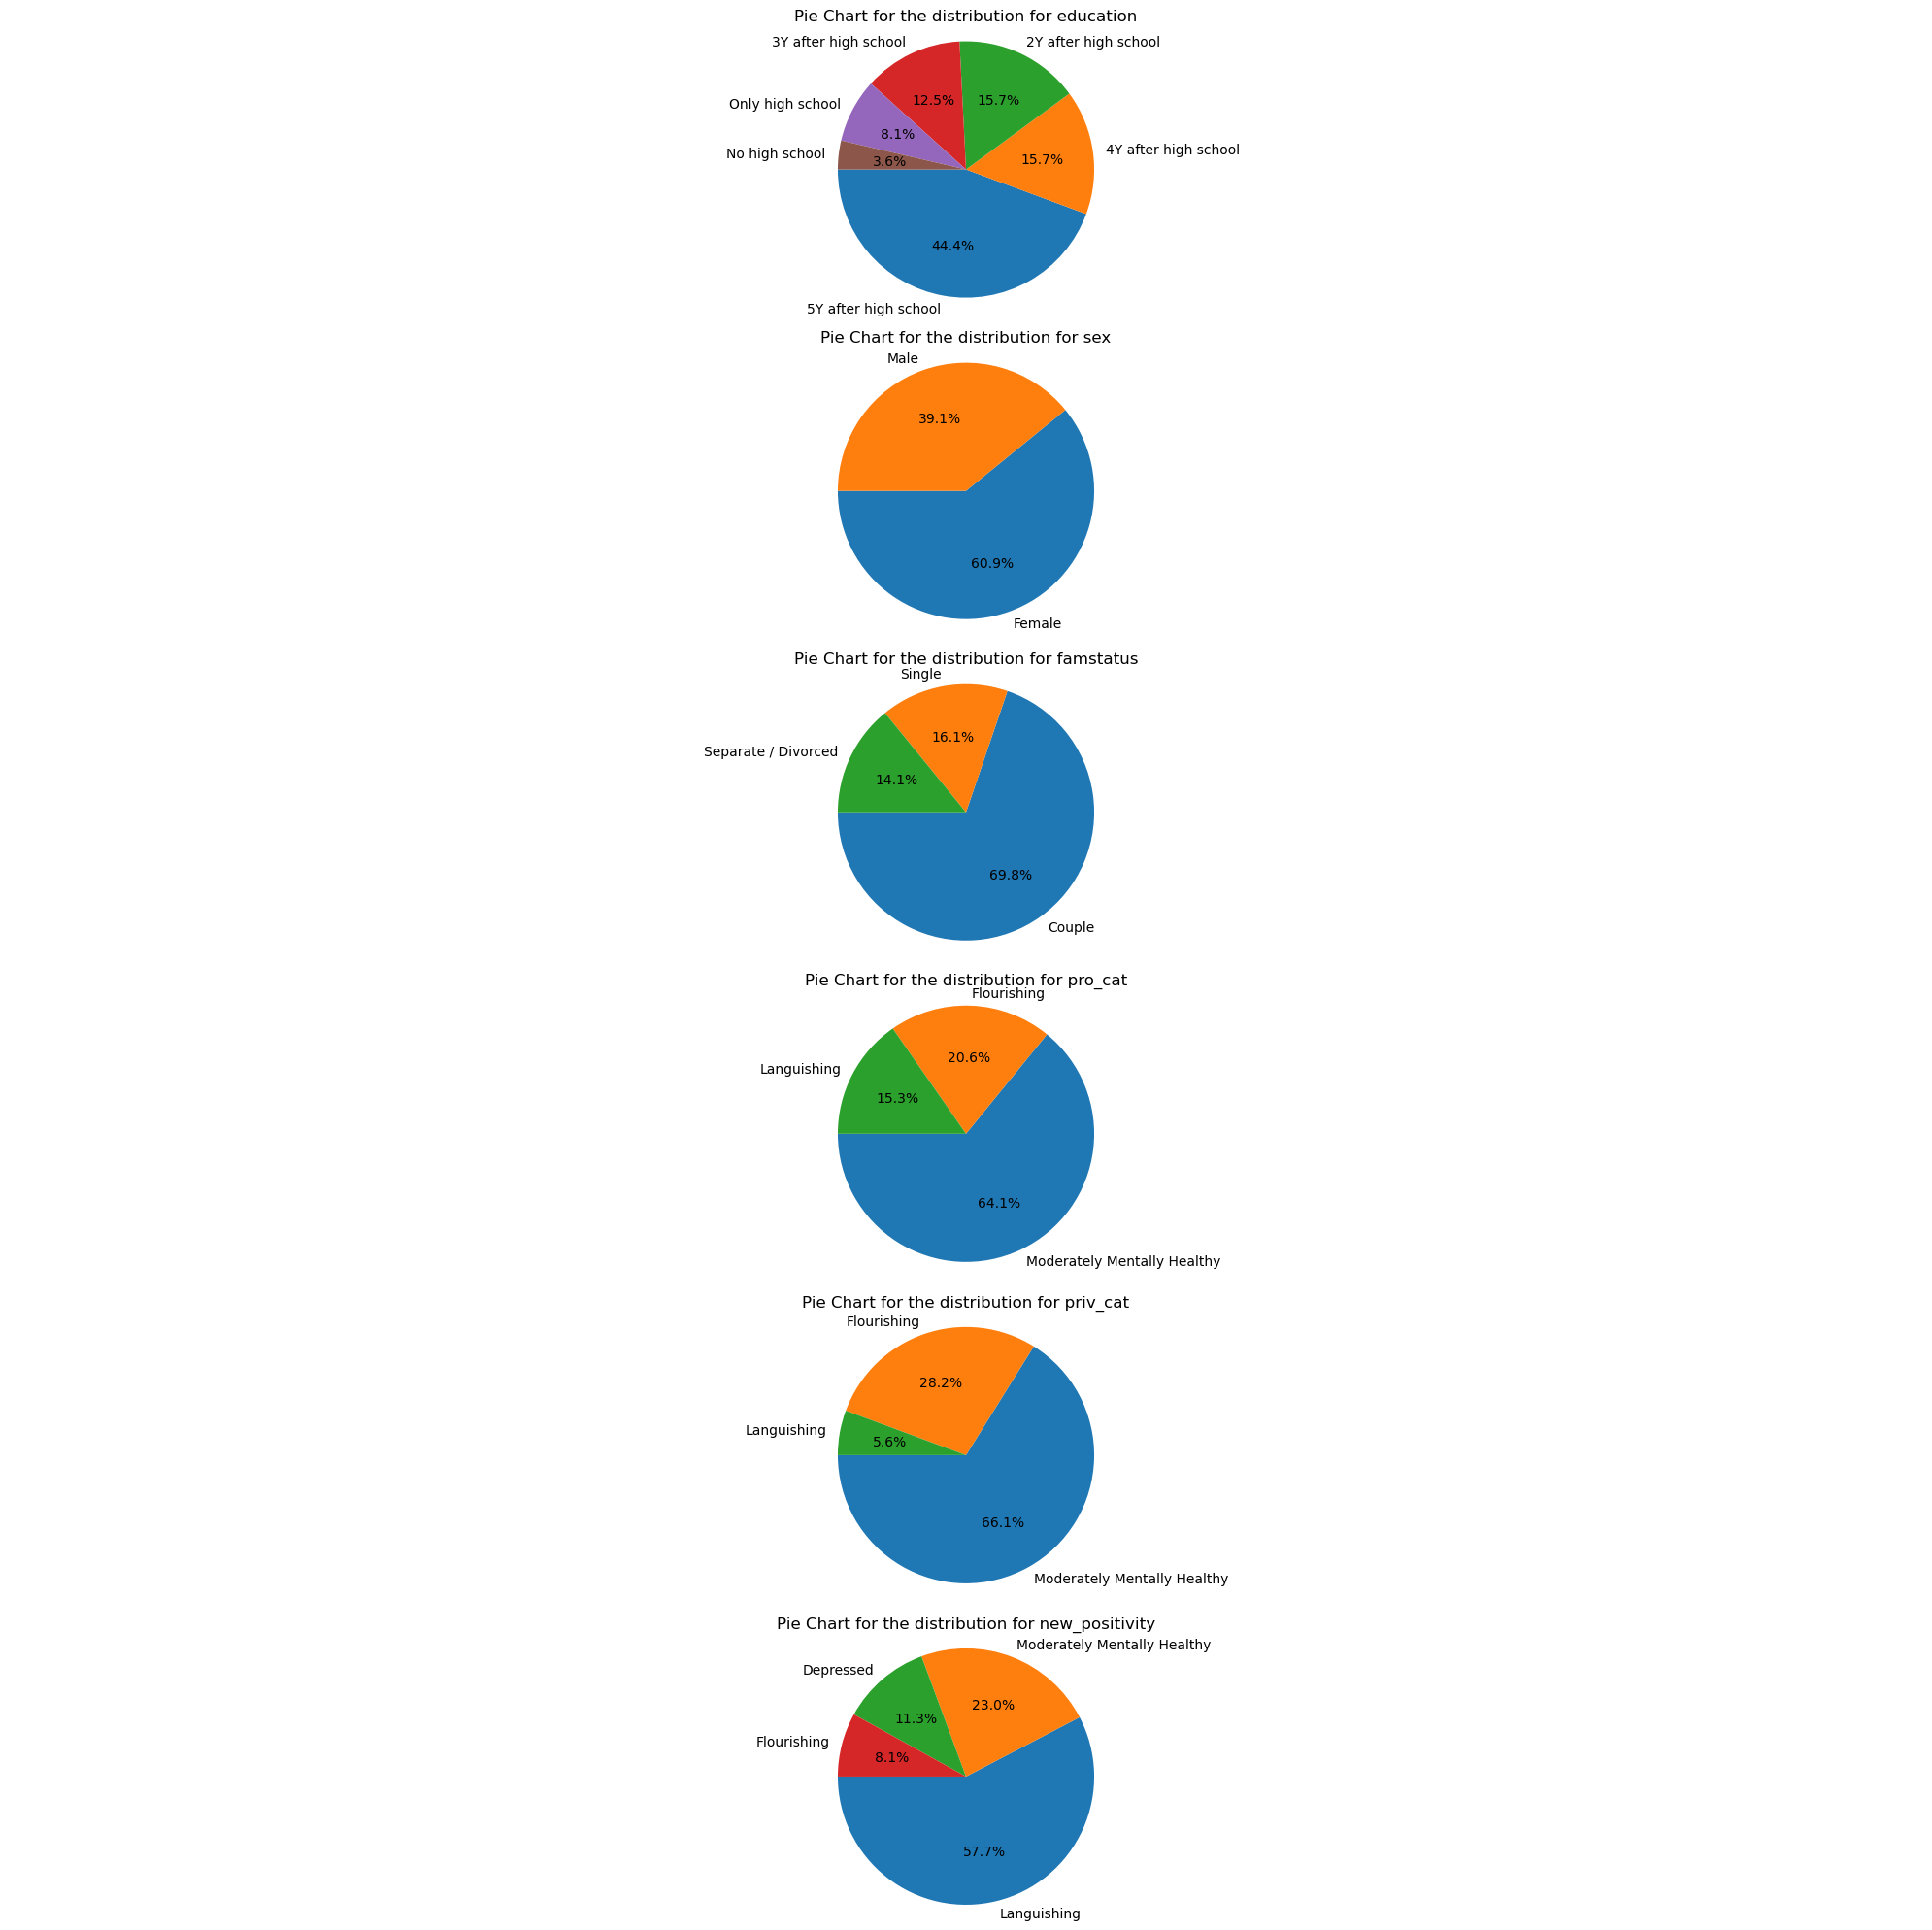

In [7]:
columns = df_cat.columns

fig, axes = plt.subplots(len(columns),1, figsize=(20, 20))

for i, column in enumerate(columns):
    ax = axes[i]
    counts = df_cat[column].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=180)
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    ax.set_title(f'Pie Chart for the distribution for {column}')

plt.tight_layout()
plt.show()  

### Plot their Bar Chart

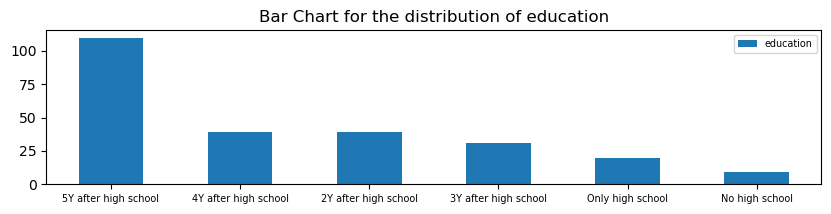

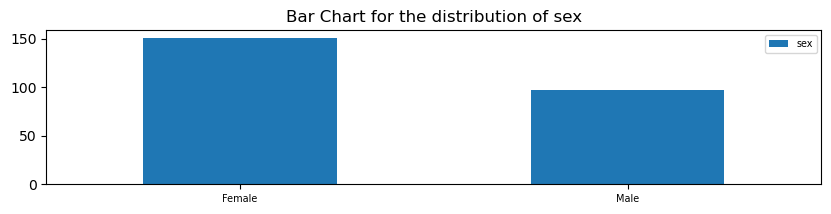

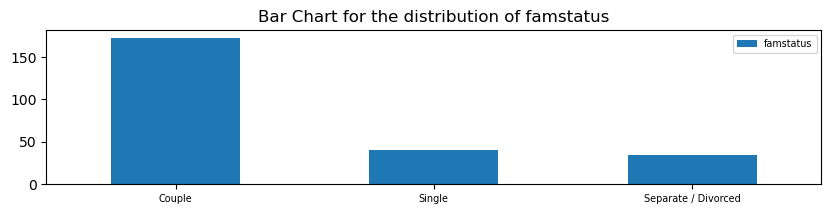

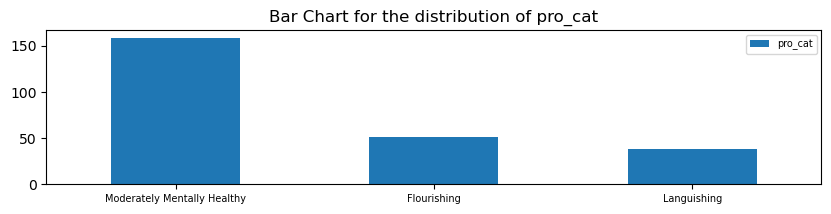

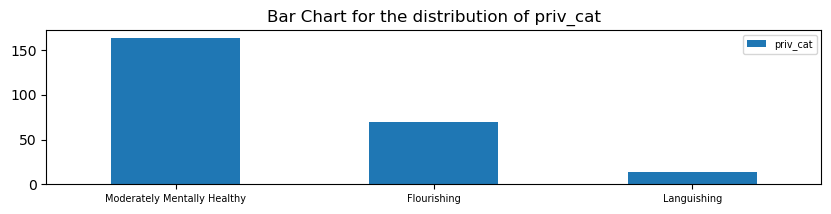

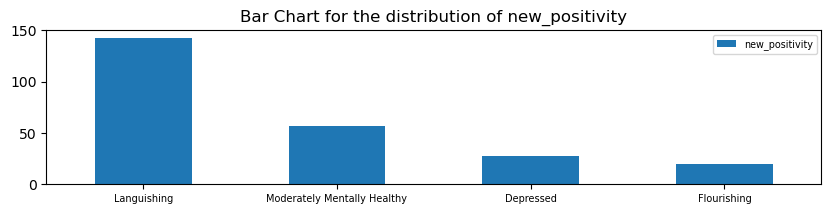

In [8]:
for column_name in df_cat.columns:
    value_counts = df_cat[column_name].value_counts()
    plt.figure(figsize=(10, 2))
    value_counts.plot.bar(legend = True)
    plt.legend(loc='upper right', fontsize = 'x-small',ncols=4)
    plt.title(f'Bar Chart for the distribution of {column_name}')  
    plt.xticks(rotation=360, fontsize = 7)
plt.show()

## If the variables are quantitative.

### Plot their histogram

In [9]:
df['ID'] = df['ID'].astype('str')
df_qt = df.select_dtypes(exclude=['object'])
df_qt.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         248 non-null    int64  
 1   pro_quant   248 non-null    int64  
 2   priv_quant  248 non-null    int64  
 3   positivity  248 non-null    float64
 4   flow        248 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 9.8 KB


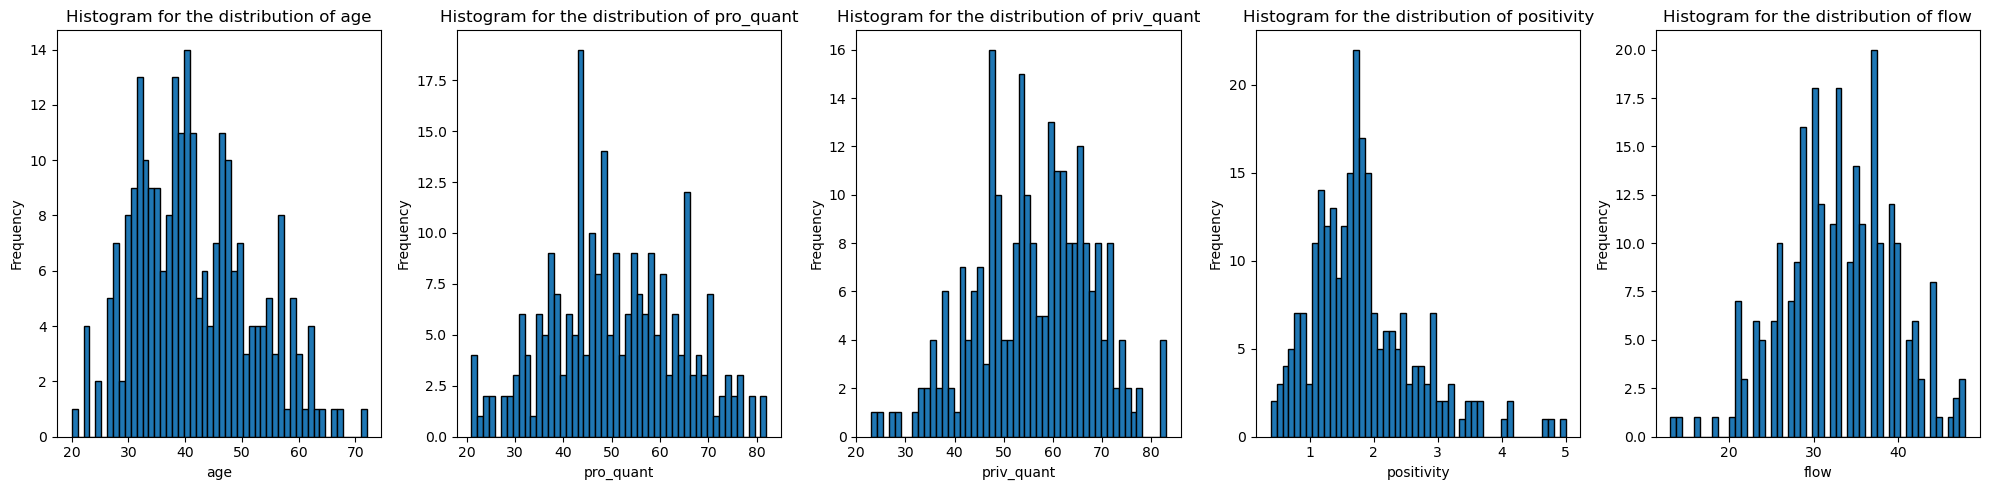

In [10]:
fig, axes = plt.subplots(1, len(df_qt.columns), figsize=(20, 5))

for i, column in enumerate(df_qt.columns):
    axes[i].hist(df_qt[column], bins=50, edgecolor='k')
    axes[i].set_title(f'Histogram for the distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Plot their boxplot

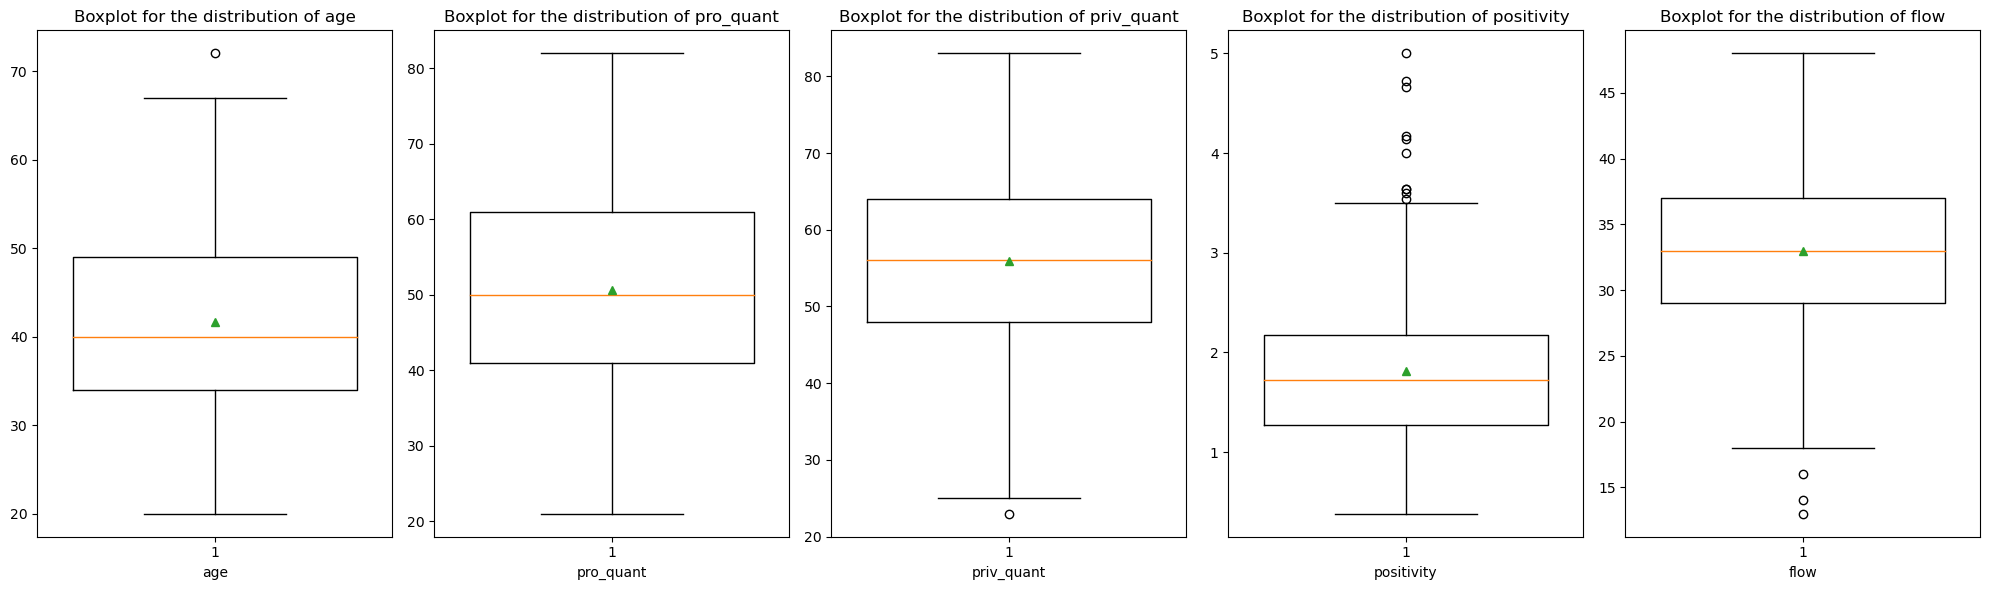

In [11]:
fig, axes = plt.subplots(1, len(df_qt.columns), figsize=(20, 6))

for i, column in enumerate(df_qt.columns):
    axes[i].boxplot(df_qt[column],showmeans=True, widths=0.8)
    axes[i].set_title(f'Boxplot for the distribution of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

# Step 2 – Bivariate Data Analysis

## If the variables are both categorical.

### Generate the contingency table


In [12]:
columns = df_cat.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        df_obs = pd.crosstab(df_cat[column1], df_cat[column2])
        chi2, p_value, dof, expected = chi2_contingency(df_obs)     
        df_exp = chi2_contingency(df_obs)[3]
        df_res = (df_obs - expected) /(df_exp)**0.5
        
        print(f"Contingency table for obervation between {column1} and {column2}:\n")
        display(df_obs)
        print(f"Contingency table for expectation between {column1} and {column2}:\n")
        display(pd.DataFrame(df_exp)) 

Contingency table for obervation between education and sex:



sex,Female,Male
education,,
2Y after high school,23,16
3Y after high school,22,9
4Y after high school,22,17
5Y after high school,67,43
No high school,5,4
Only high school,12,8


Contingency table for expectation between education and sex:



,0,1
0,23.745968,15.254032
1,18.875000,12.125000
2,23.745968,15.254032
3,66.975806,43.024194
4,5.479839,3.520161
5,12.177419,7.822581


Contingency table for obervation between education and famstatus:



famstatus,Couple,Separate / Divorced,Single
education,,,
2Y after high school,27,7,5
3Y after high school,18,7,6
4Y after high school,27,6,6
5Y after high school,84,10,16
No high school,7,1,1
Only high school,10,4,6


Contingency table for expectation between education and famstatus:



,0,1,2
0,27.205645,5.504032,6.290323
1,21.625000,4.375000,5.000000
2,27.205645,5.504032,6.290323
3,76.733871,15.524194,17.741935
4,6.278226,1.270161,1.451613
5,13.951613,2.822581,3.225806


Contingency table for obervation between education and pro_cat:



pro_cat,Flourishing,Languishing,Moderately Mentally Healthy
education,,,
2Y after high school,11,6,22
3Y after high school,4,6,21
4Y after high school,9,4,26
5Y after high school,17,20,73
No high school,2,0,7
Only high school,8,2,10


Contingency table for expectation between education and pro_cat:



,0,1,2
0,8.020161,5.975806,25.004032
1,6.375000,4.750000,19.875000
2,8.020161,5.975806,25.004032
3,22.620968,16.854839,70.524194
4,1.850806,1.379032,5.770161
5,4.112903,3.064516,12.822581


Contingency table for obervation between education and priv_cat:



priv_cat,Flourishing,Languishing,Moderately Mentally Healthy
education,,,
2Y after high school,9,2,28
3Y after high school,11,1,19
4Y after high school,10,2,27
5Y after high school,28,7,75
No high school,1,1,7
Only high school,11,1,8


Contingency table for expectation between education and priv_cat:



,0,1,2
0,11.008065,2.201613,25.790323
1,8.750000,1.750000,20.500000
2,11.008065,2.201613,25.790323
3,31.048387,6.209677,72.741935
4,2.540323,0.508065,5.951613
5,5.645161,1.129032,13.225806


Contingency table for obervation between education and new_positivity:



new_positivity,Depressed,Flourishing,Languishing,Moderately Mentally Healthy
education,,,,
2Y after high school,4,1,24,10
3Y after high school,1,2,14,14
4Y after high school,3,5,24,7
5Y after high school,17,10,69,14
No high school,1,1,4,3
Only high school,2,1,8,9


Contingency table for expectation between education and new_positivity:



,0,1,2,3
0,4.403226,3.145161,22.487903,8.963710
1,3.500000,2.500000,17.875000,7.125000
2,4.403226,3.145161,22.487903,8.963710
3,12.419355,8.870968,63.427419,25.282258
4,1.016129,0.725806,5.189516,2.068548
5,2.258065,1.612903,11.532258,4.596774


Contingency table for obervation between sex and famstatus:



famstatus,Couple,Separate / Divorced,Single
sex,,,
Female,99,29,23
Male,74,6,17


Contingency table for expectation between sex and famstatus:



,0,1,2
0,105.334677,21.310484,24.354839
1,67.665323,13.689516,15.645161


Contingency table for obervation between sex and pro_cat:



pro_cat,Flourishing,Languishing,Moderately Mentally Healthy
sex,,,
Female,29,24,98
Male,22,14,61


Contingency table for expectation between sex and pro_cat:



,0,1,2
0,31.052419,23.137097,96.810484
1,19.947581,14.862903,62.189516


Contingency table for obervation between sex and priv_cat:



priv_cat,Flourishing,Languishing,Moderately Mentally Healthy
sex,,,
Female,41,7,103
Male,29,7,61


Contingency table for expectation between sex and priv_cat:



,0,1,2
0,42.620968,8.524194,99.854839
1,27.379032,5.475806,64.145161


Contingency table for obervation between sex and new_positivity:



new_positivity,Depressed,Flourishing,Languishing,Moderately Mentally Healthy
sex,,,,
Female,19,8,91,33
Male,9,12,52,24


Contingency table for expectation between sex and new_positivity:



,0,1,2,3
0,17.048387,12.177419,87.068548,34.705645
1,10.951613,7.822581,55.931452,22.294355


Contingency table for obervation between famstatus and pro_cat:



pro_cat,Flourishing,Languishing,Moderately Mentally Healthy
famstatus,,,
Couple,35,23,115
Separate / Divorced,6,8,21
Single,10,7,23


Contingency table for expectation between famstatus and pro_cat:



,0,1,2
0,35.576613,26.508065,110.915323
1,7.197581,5.362903,22.439516
2,8.225806,6.129032,25.645161


Contingency table for obervation between famstatus and priv_cat:



priv_cat,Flourishing,Languishing,Moderately Mentally Healthy
famstatus,,,
Couple,54,5,114
Separate / Divorced,7,3,25
Single,9,6,25


Contingency table for expectation between famstatus and priv_cat:



,0,1,2
0,48.830645,9.766129,114.403226
1,9.879032,1.975806,23.145161
2,11.290323,2.258065,26.451613


Contingency table for obervation between famstatus and new_positivity:



new_positivity,Depressed,Flourishing,Languishing,Moderately Mentally Healthy
famstatus,,,,
Couple,15,15,100,43
Separate / Divorced,6,3,20,6
Single,7,2,23,8


Contingency table for expectation between famstatus and new_positivity:



,0,1,2,3
0,19.532258,13.951613,99.754032,39.762097
1,3.951613,2.822581,20.181452,8.044355
2,4.516129,3.225806,23.064516,9.193548


Contingency table for obervation between pro_cat and priv_cat:



priv_cat,Flourishing,Languishing,Moderately Mentally Healthy
pro_cat,,,
Flourishing,35,1,15
Languishing,3,8,27
Moderately Mentally Healthy,32,5,122


Contingency table for expectation between pro_cat and priv_cat:



,0,1,2
0,14.395161,2.879032,33.725806
1,10.725806,2.145161,25.129032
2,44.879032,8.975806,105.145161


Contingency table for obervation between pro_cat and new_positivity:



new_positivity,Depressed,Flourishing,Languishing,Moderately Mentally Healthy
pro_cat,,,,
Flourishing,0,11,12,28
Languishing,15,1,20,2
Moderately Mentally Healthy,13,8,111,27


Contingency table for expectation between pro_cat and new_positivity:



,0,1,2,3
0,5.758065,4.112903,29.407258,11.721774
1,4.290323,3.064516,21.911290,8.733871
2,17.951613,12.822581,91.681452,36.544355


Contingency table for obervation between priv_cat and new_positivity:



new_positivity,Depressed,Flourishing,Languishing,Moderately Mentally Healthy
priv_cat,,,,
Flourishing,1,11,24,34
Languishing,8,0,5,1
Moderately Mentally Healthy,19,9,114,22


Contingency table for expectation between priv_cat and new_positivity:



,0,1,2,3
0,7.903226,5.645161,40.362903,16.088710
1,1.580645,1.129032,8.072581,3.217742
2,18.516129,13.225806,94.564516,37.693548


### Check the significance of their relationship with the chi-square test & provide Cramer’s V

In [13]:
columns = df_cat.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        p_value = round(chi2_contingency(pd.crosstab(df_cat[column1], df_cat[column2]))[1],4)
        if p_value < 0.05:       
            print(f"The p-value from chi-square test between {column1} and {column2} is {p_value}, since it is smaller than the significance level, we should reject the null hypithesis, {column1} and {column2} are linked." )
        else:
            print(f"The p-value from chi-square test between {column1} and {column2} is {p_value}, since it is larger than the significance level, we should not reject the null hypithesis, {column1} and {column2} are independent.")

The p-value from chi-square test between education and sex is 0.8728, since it is larger than the significance level, we should not reject the null hypithesis, education and sex are independent.
The p-value from chi-square test between education and famstatus is 0.4217, since it is larger than the significance level, we should not reject the null hypithesis, education and famstatus are independent.
The p-value from chi-square test between education and pro_cat is 0.2886, since it is larger than the significance level, we should not reject the null hypithesis, education and pro_cat are independent.
The p-value from chi-square test between education and priv_cat is 0.3594, since it is larger than the significance level, we should not reject the null hypithesis, education and priv_cat are independent.
The p-value from chi-square test between education and new_positivity is 0.0298, since it is smaller than the significance level, we should reject the null hypithesis, education and new_posi

In [14]:
columns = df_cat.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        X2 = chi2_contingency(pd.crosstab(df[column1], df[column2]))[0]
        N = len(df)
        minimum_dimension = min(pd.crosstab(df[column1], df[column2]).shape)-1
        Cramers_V = round(np.sqrt((X2/N) / minimum_dimension),2)
        if Cramers_V < 0.1:       
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it below 0.1,the strength of the relationship between is not significant.")
        elif Cramers_V >= 0.1 and Cramers_V < 0.3 :
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.1 and 0.3,the strength of the relationship between is small.")
        elif Cramers_V >= 0.3 and Cramers_V < 0.5 :
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.3 and 0.5,the strength of the relationship between is moderate.")
        elif Cramers_V >= 0.5 and Cramers_V < 0.7 :
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.5 and 0.7,the strength of the relationship between is strong.")
        elif Cramers_V >= 0.7 and Cramers_V < 0.9 :
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it between 0.3 and 0.5,the strength of the relationship between is very strong.")
        else:
            print(f"The Cramer's V between {column1} and {column2} is {Cramers_V}, since it above 0.9, check if these two variables have colinearity problem.")

The Cramer's V between education and sex is 0.09, since it below 0.1,the strength of the relationship between is not significant.
The Cramer's V between education and famstatus is 0.14, since it between 0.1 and 0.3,the strength of the relationship between is small.
The Cramer's V between education and pro_cat is 0.16, since it between 0.1 and 0.3,the strength of the relationship between is small.
The Cramer's V between education and priv_cat is 0.15, since it between 0.1 and 0.3,the strength of the relationship between is small.
The Cramer's V between education and new_positivity is 0.19, since it between 0.1 and 0.3,the strength of the relationship between is small.
The Cramer's V between sex and famstatus is 0.18, since it between 0.1 and 0.3,the strength of the relationship between is small.
The Cramer's V between sex and pro_cat is 0.04, since it below 0.1,the strength of the relationship between is not significant.
The Cramer's V between sex and priv_cat is 0.07, since it below 0.

### Plot their side-by-side bar charts

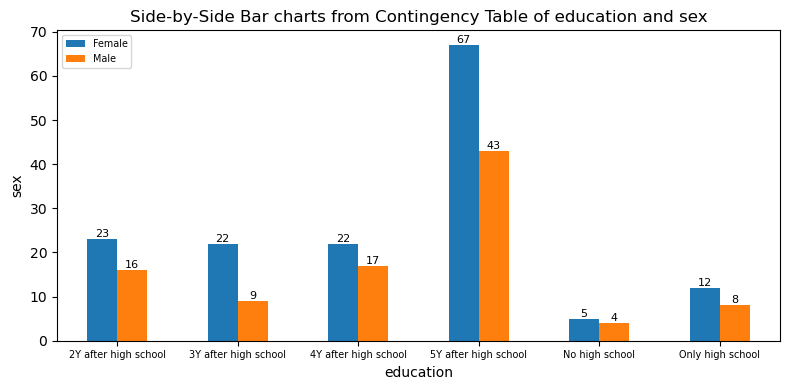

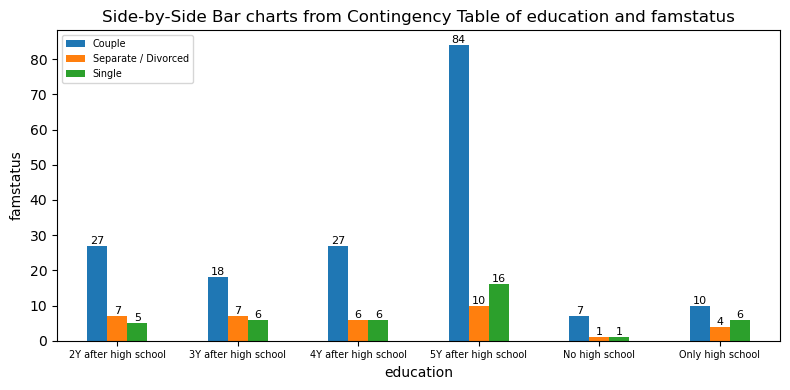

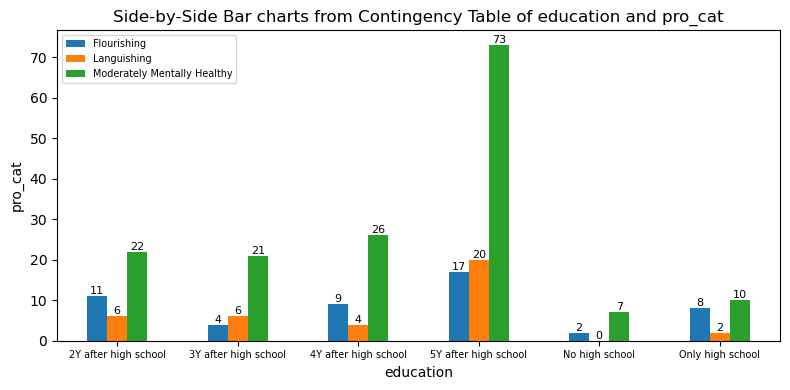

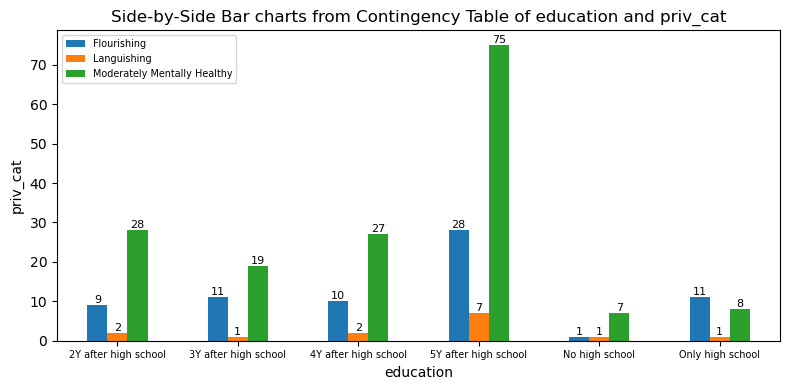

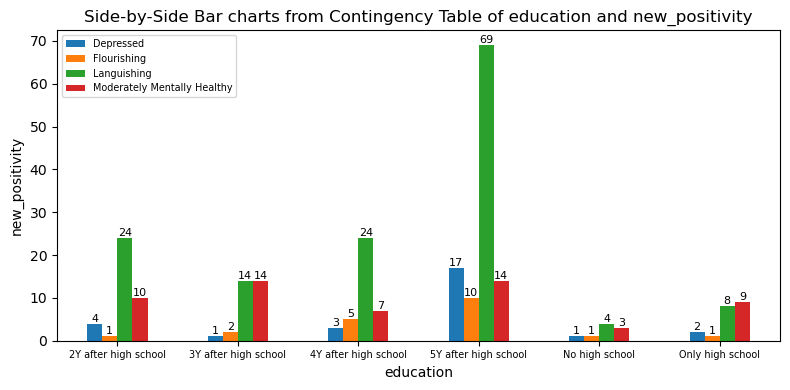

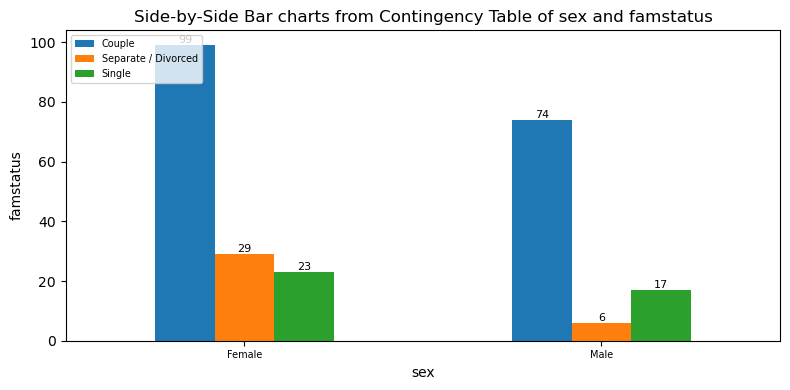

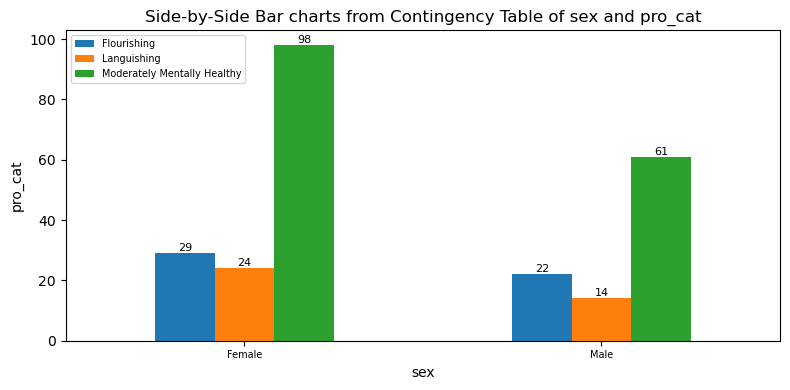

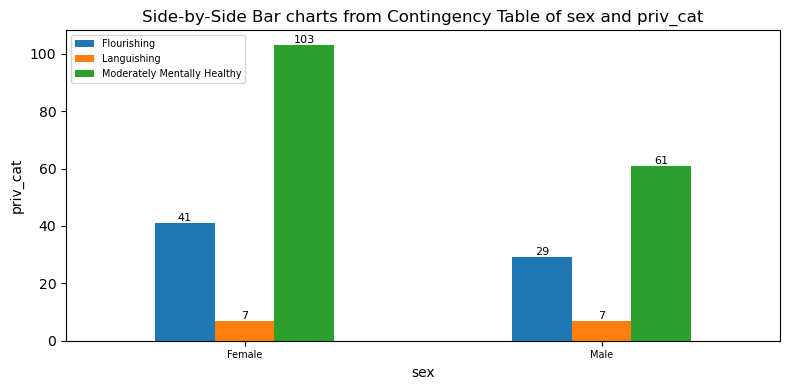

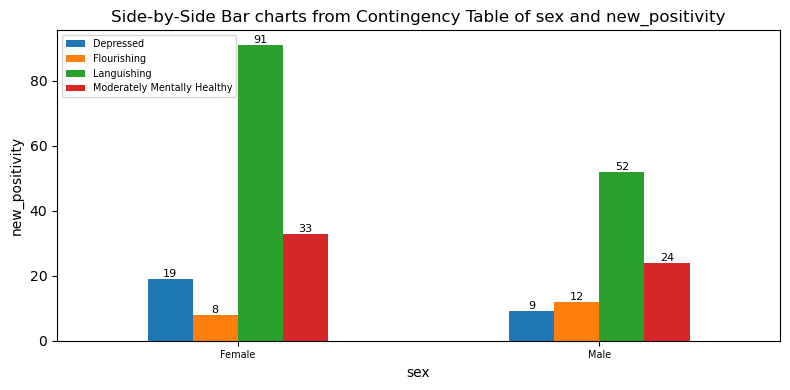

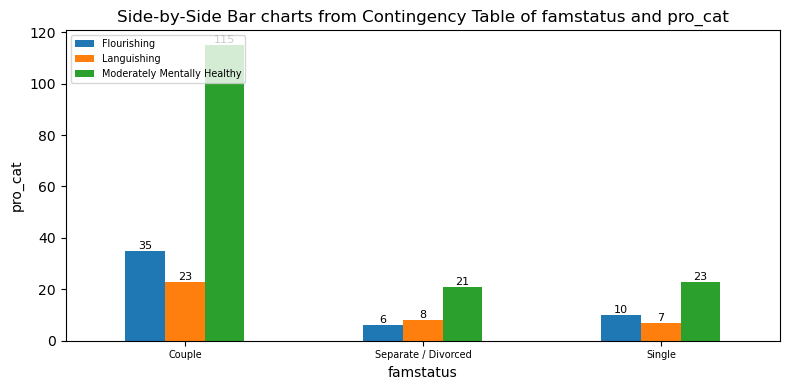

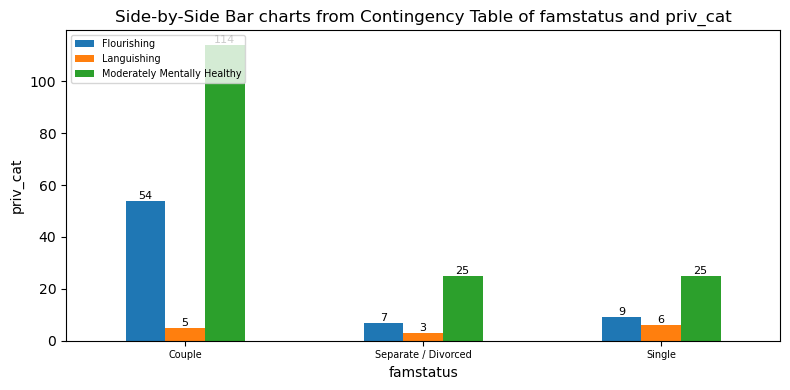

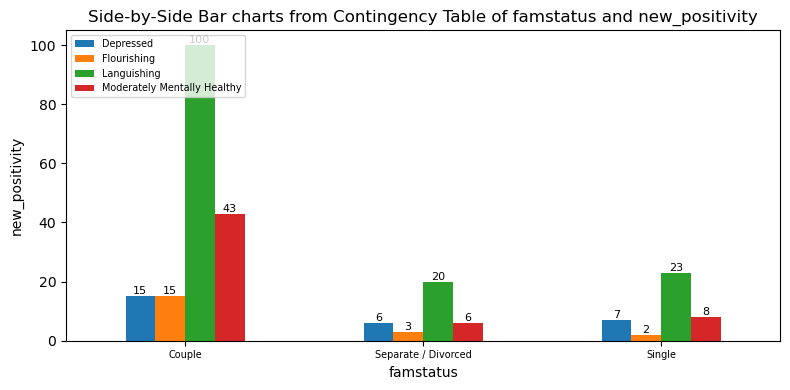

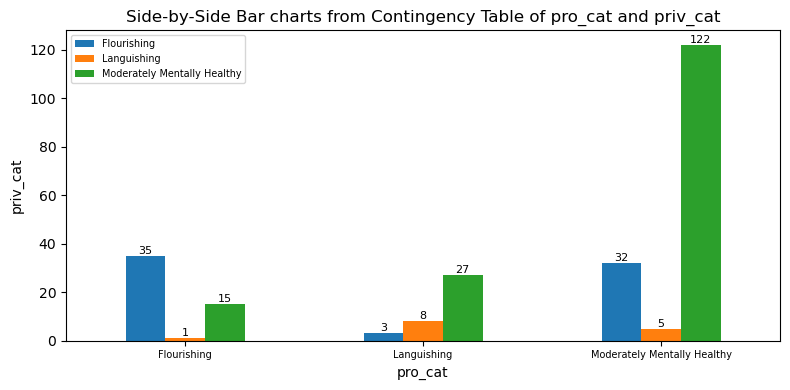

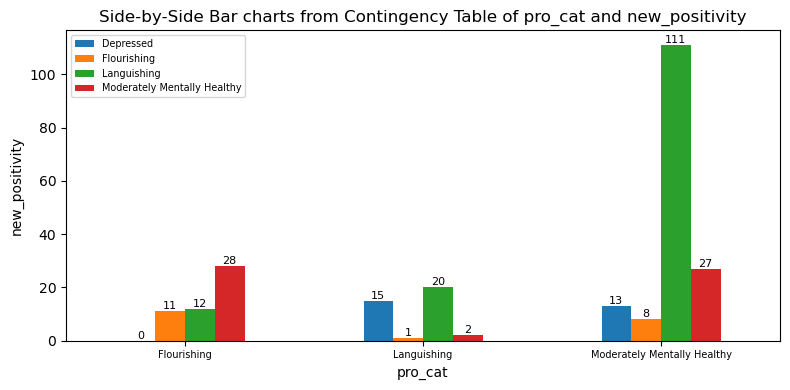

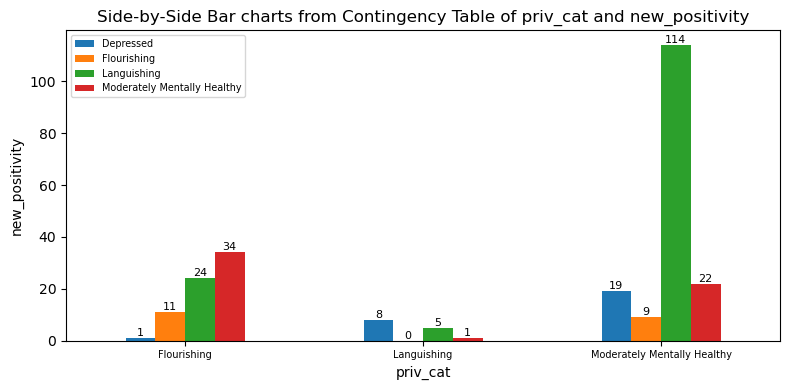

In [15]:
columns = df_cat.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        contingency_table = pd.crosstab(df_cat[column1], df_cat[column2])
        ax = contingency_table.plot(kind='bar', figsize = (8,4))
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title(f'Side-by-Side Bar charts from Contingency Table of {column1} and {column2}')
        plt.xticks(rotation=360, fontsize = 7)
        plt.legend(loc='upper left', fontsize = 'x-small', ncol = 1)
        
        
        for c in ax.containers:
            ax.bar_label(c, 
#                          label_type='center',
                         size=8)
        plt.tight_layout()
        plt.show()

### Plot their stacked bar charts

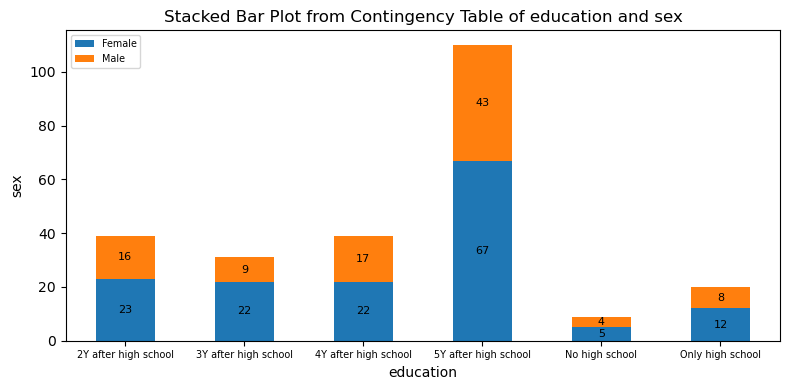

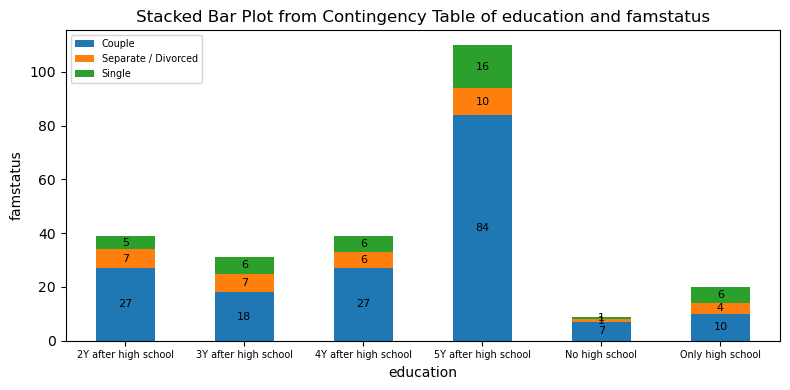

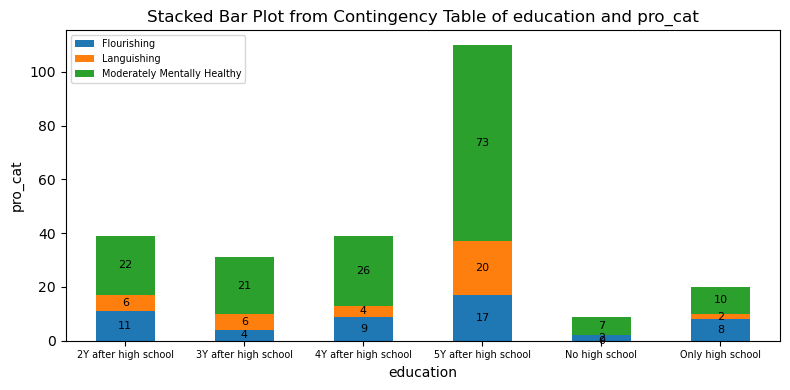

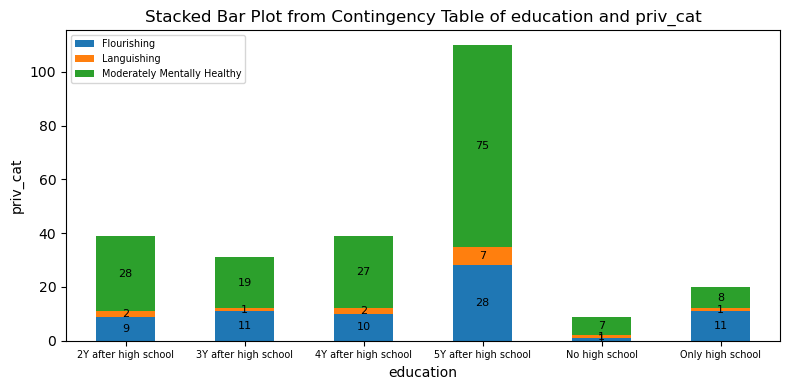

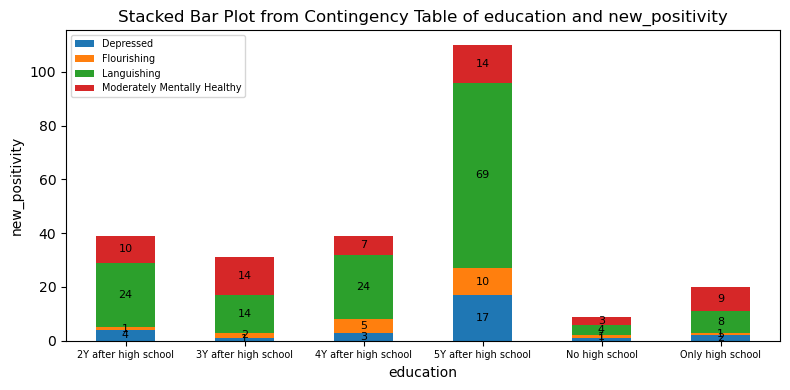

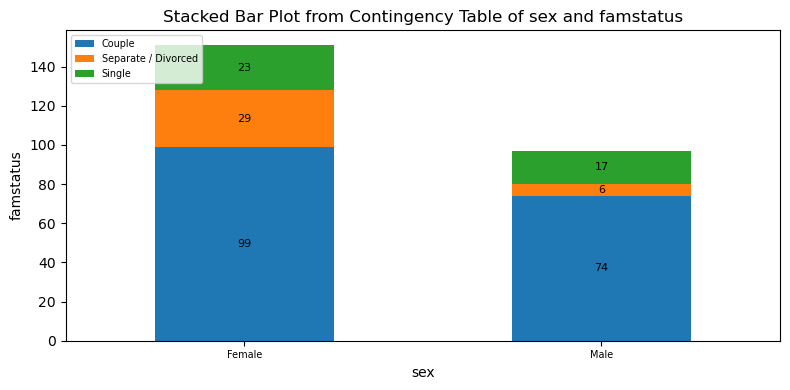

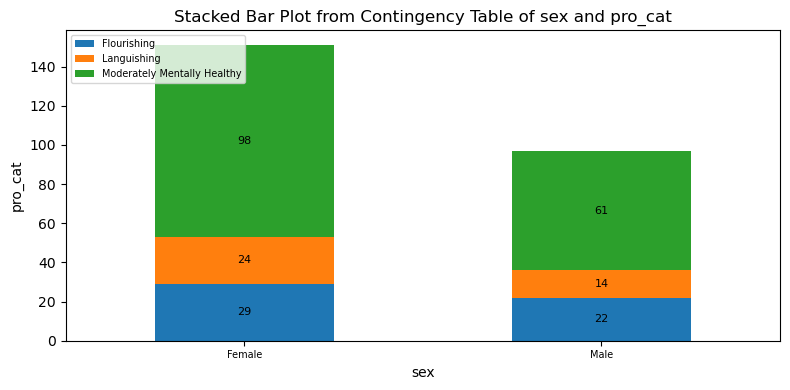

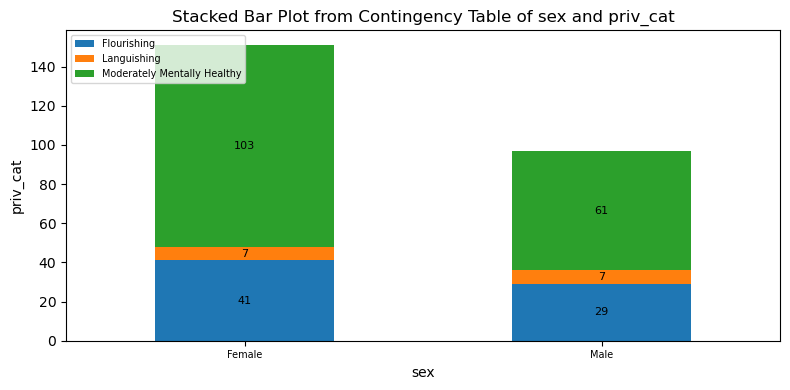

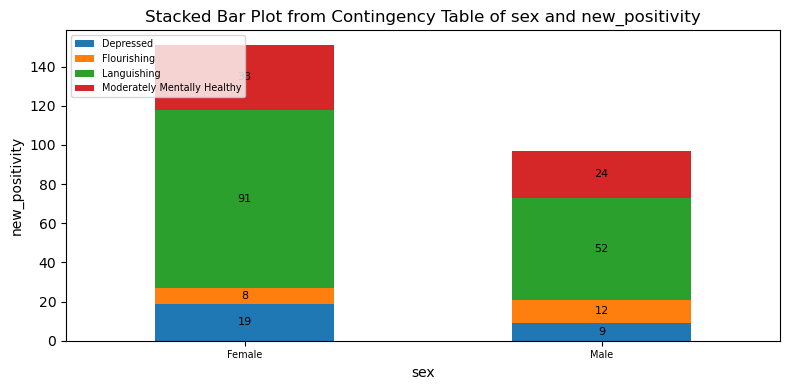

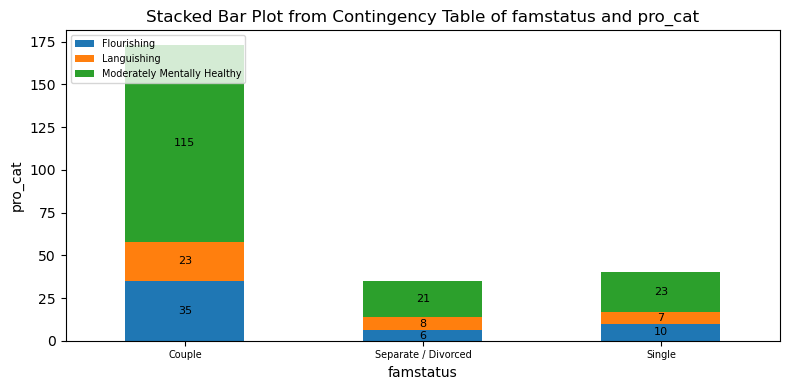

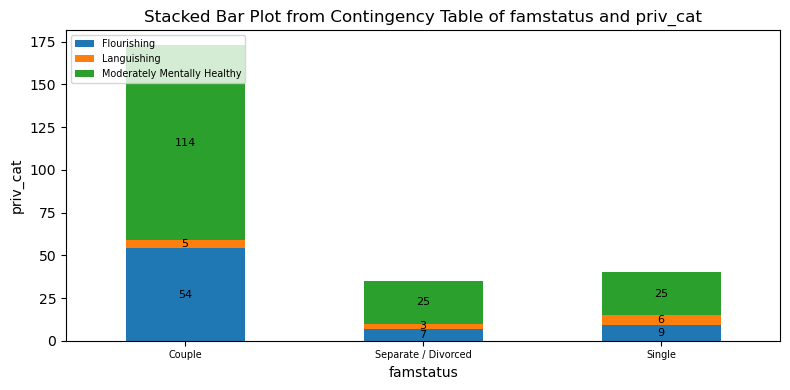

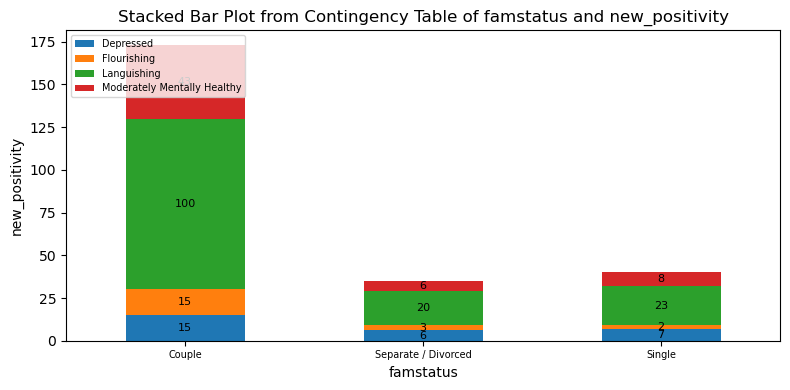

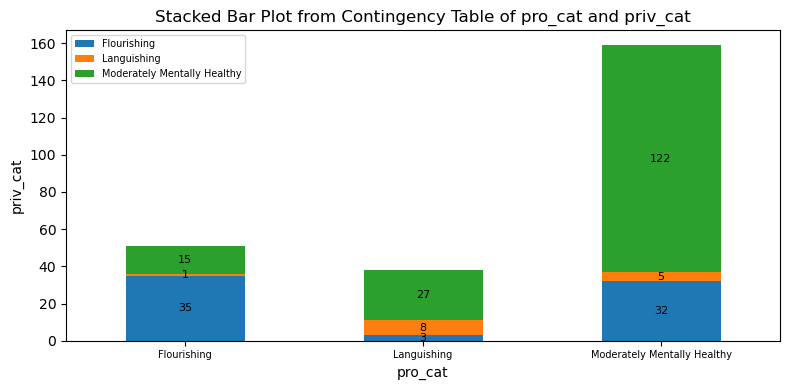

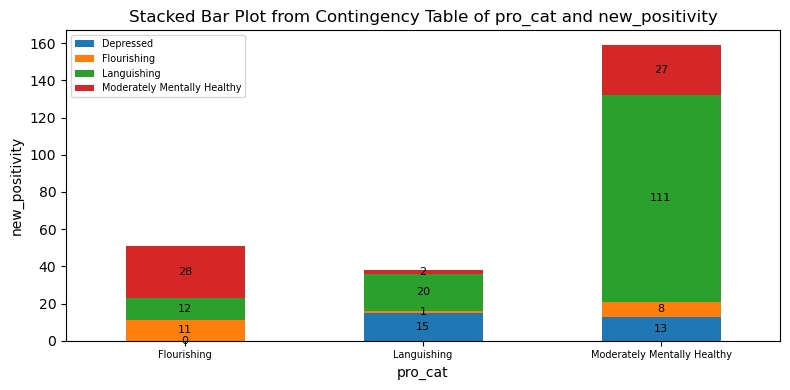

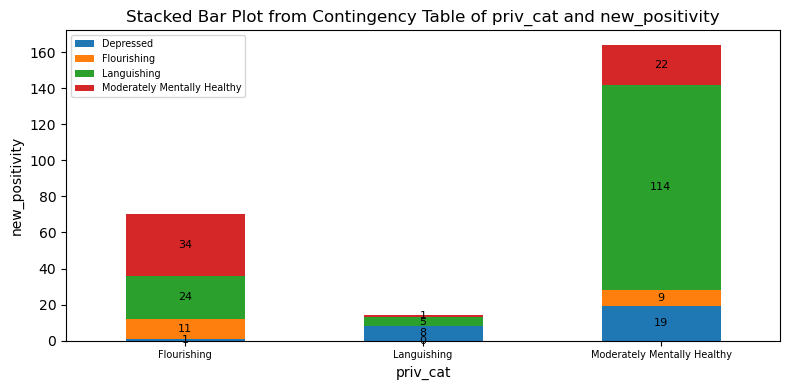

In [16]:
columns = df_cat.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]

        contingency_table = pd.crosstab(df_cat[column1], df_cat[column2])
        ax = contingency_table.plot(kind='bar', stacked=True, figsize = (8,4))
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.title(f'Stacked Bar Plot from Contingency Table of {column1} and {column2}')
        plt.xticks(rotation=360, fontsize = 7)
        plt.legend(loc='upper left', fontsize = 'x-small', ncol = 1)
        
        for c in ax.containers:
            ax.bar_label(c, label_type='center',  size=8)
        plt.tight_layout()
        plt.show()

## If the variables are both quantitative.

### Compute the correlation (table)


In [17]:
print("---------------the correlation table of quantitative variables----------------------------------")
display(df_qt.corr())

---------------the correlation table of quantitative variables----------------------------------


,age,pro_quant,priv_quant,positivity,flow
age,1.000000,0.229625,0.151607,0.257054,0.367994
pro_quant,0.229625,1.000000,0.635679,0.603502,0.536229
priv_quant,0.151607,0.635679,1.000000,0.636000,0.409439
positivity,0.257054,0.603502,0.636000,1.000000,0.439782
flow,0.367994,0.536229,0.409439,0.439782,1.000000


### Check the significance of their relationship with the correlation test & provide the r value

In [18]:
columns = df_qt.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]
        
        result = pearsonr(df_qt[column1], df_qt[column2])
        r_value = round(result[0],4)
        pvalue = round(result[1],4)
        
        print(f"The Pearson correlation coefficient (r-value) between {column1} and {column2} is {r_value}, and the two-tailed p-value is {pvalue}") 
       
        if r_value == -1:
            print(f"Since the correlation coefficient is -1, there is a perfect negative association between {column1} and {column2}")
        elif r_value > -1 and r_value <= -0.5 :
            print(f"Since the correlation coefficient is close to -1, there is a strong negative association between {column1} and {column2}")
        elif r_value > -0.5   and r_value < 0 :
            print(f"Since the correlation coefficient is below and close to 0, there is a slightly negative association between {column1} and {column2}")
        elif r_value == 0 :
            print(f"Since the correlation coefficient is 0, there is no association between {column1} and {column2}") 
        elif r_value > 0   and r_value <= 0.5 :
            print(f"Since the correlation coefficient is above and close to 0, there is a slightly positive association between {column1} and {column2}")
        elif r_value > 0.5   and r_value < 1 :
            print(f"Since the correlation coefficient is close to 1, there is a strongly postive association between {column1} and {column2}")
        elif r_value == 1:
            print(f"Since the correlation coefficient is 1, there is a perfect positive association between {column1} and {column2}")
        else:
            print("Something is wrong, check your code ASAP!")
                        
            
        if pvalue < 0.05 :
            print(f", and the corresponding p-value is less than .05, there is a statistically significant association between the two variables.")
        else:
            print(f", and the corresponding p-value is larger than .05, there is no statistically significant association between the two variables.")

The Pearson correlation coefficient (r-value) between age and pro_quant is 0.2296, and the two-tailed p-value is 0.0003
Since the correlation coefficient is above and close to 0, there is a slightly positive association between age and pro_quant
, and the corresponding p-value is less than .05, there is a statistically significant association between the two variables.
The Pearson correlation coefficient (r-value) between age and priv_quant is 0.1516, and the two-tailed p-value is 0.0169
Since the correlation coefficient is above and close to 0, there is a slightly positive association between age and priv_quant
, and the corresponding p-value is less than .05, there is a statistically significant association between the two variables.
The Pearson correlation coefficient (r-value) between age and positivity is 0.2571, and the two-tailed p-value is 0.0
Since the correlation coefficient is above and close to 0, there is a slightly positive association between age and positivity
, and the

### Plot their scatter plot (matrix)

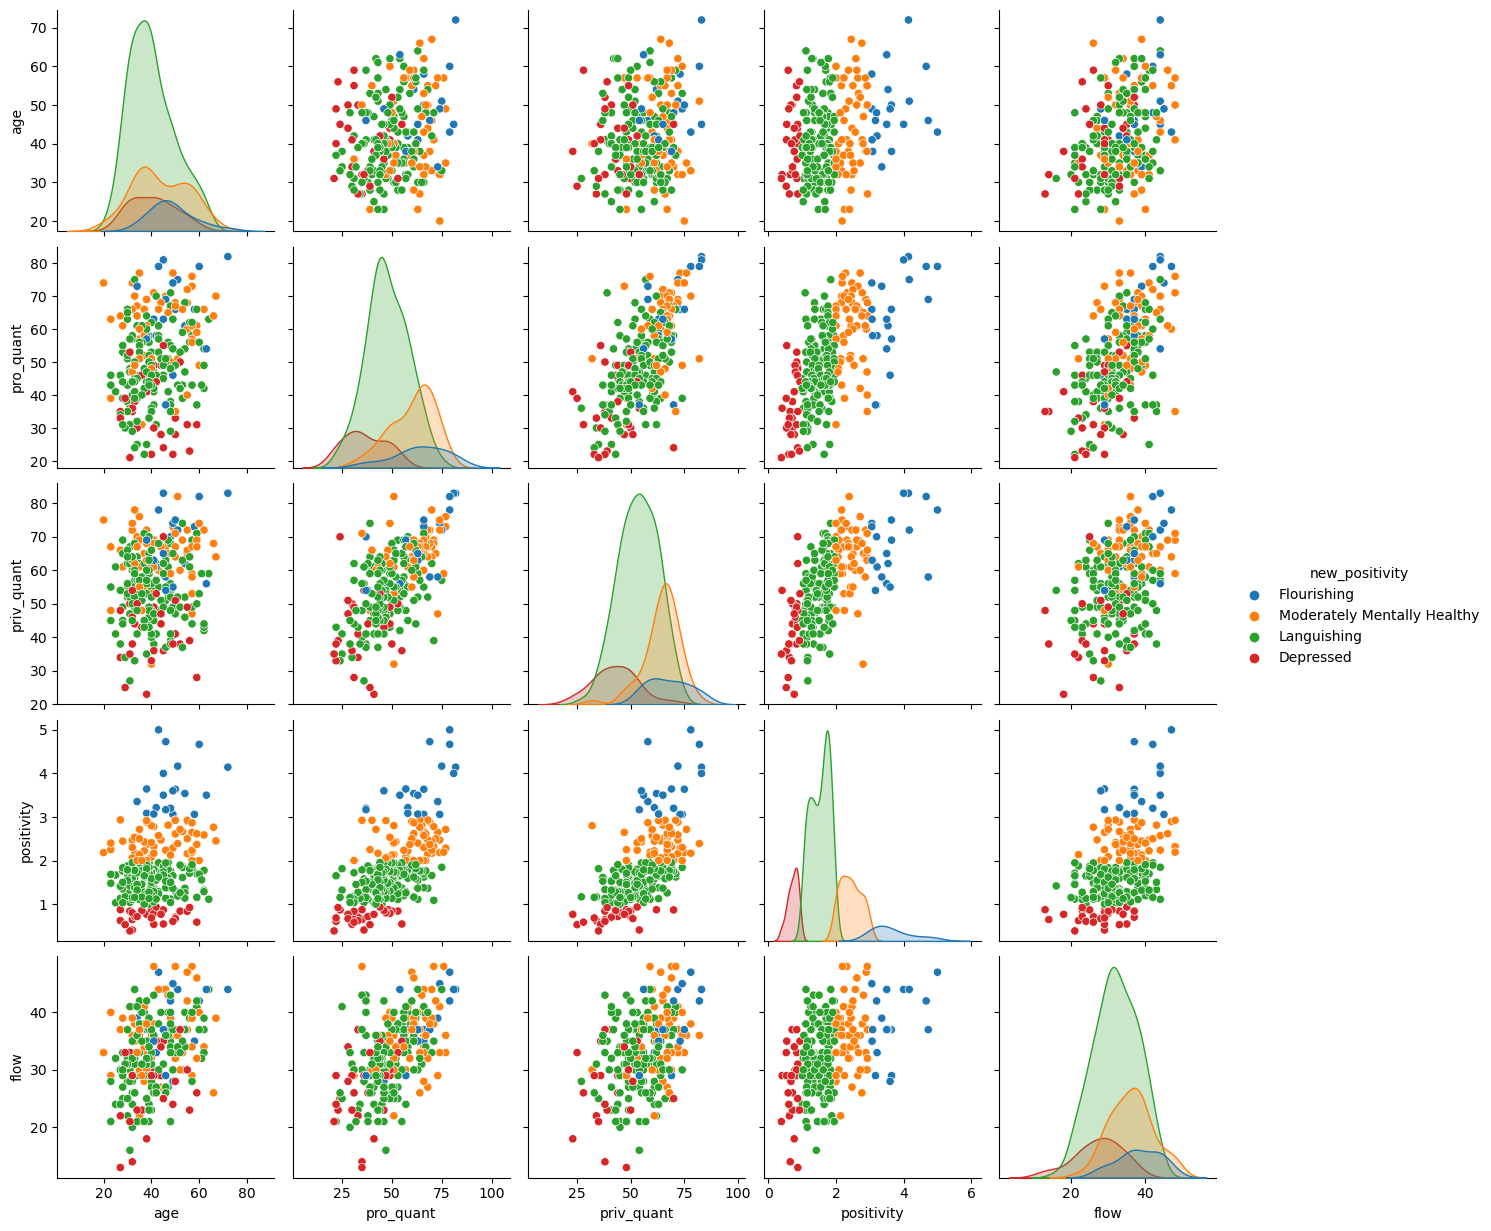

In [19]:
sns.pairplot(df, hue="new_positivity")

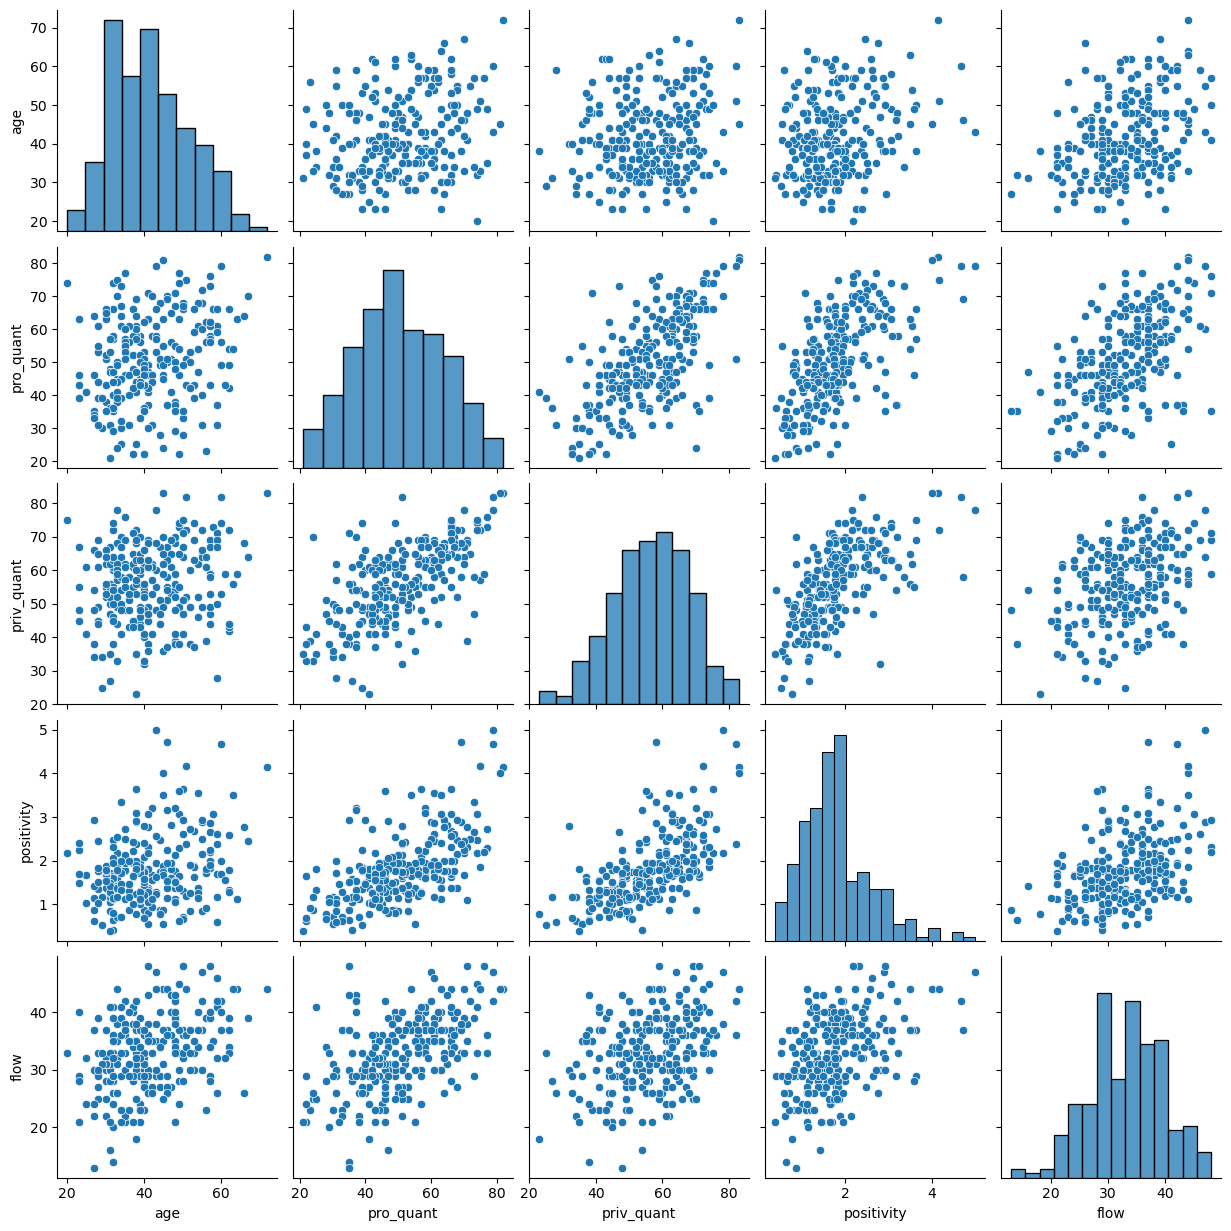

In [20]:
sns.pairplot(df_qt)

## If the variables are mixed categorical & quantitative.


### Compute the anova table

In [21]:
import pandas as pd
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations

In [22]:
columns = df.columns

for i in (2,3,4,5,7,11):
    for j in (1,6,8,9,10):
        categorical_col = columns[i]
        quantitative_col = columns[j]

        model = ols(f'{quantitative_col} ~ {categorical_col}', data=df).fit()

        anova_table = sm.stats.anova_lm(model, typ=2)

        print(f"ANOVA Table for {quantitative_col} and {categorical_col}:\n")
        print(anova_table)
        print("\n")

ANOVA Table for age and education:

                 sum_sq     df         F    PR(>F)
education    962.071856    5.0  1.900009  0.094983
Residual   24507.395886  242.0       NaN       NaN


ANOVA Table for pro_quant and education:

                 sum_sq     df         F    PR(>F)
education   2164.319879    5.0  2.470794  0.033138
Residual   42396.518831  242.0       NaN       NaN


ANOVA Table for priv_quant and education:

                 sum_sq     df         F    PR(>F)
education    935.171854    5.0  1.397943  0.225657
Residual   32377.791855  242.0       NaN       NaN


ANOVA Table for positivity and education:

               sum_sq     df         F    PR(>F)
education    4.535667    5.0  1.417046  0.218672
Residual   154.918216  242.0       NaN       NaN


ANOVA Table for flow and education:

                sum_sq     df         F    PR(>F)
education   773.331928    5.0  3.748892  0.002747
Residual   9984.087426  242.0       NaN       NaN


ANOVA Table for age and sex:

   

### Check the significance of the difference in values between groups

In [23]:
columns = df.columns

for i in (2,3,4,5,7,11):
    for j in (1,6,8,9,10):
        categorical_col = columns[i]
        quantitative_col = columns[j]

        model = ols(f'{quantitative_col} ~ {categorical_col}', data=df).fit()

        anova_table = sm.stats.anova_lm(model, typ=2)
        p_value = round(anova_table['PR(>F)'][categorical_col],4)

        if p_value < 0.05:
            print(f"The p value for {quantitative_col} and {categorical_col} is {p_value}, we reject the null hypothesis: the difference between groups is statistical significant.")
        else:
            print(f"The p value for {quantitative_col} and {categorical_col} is {p_value}, we could not reject the null hypothesis: the difference between groups is not statistical significant.")

The p value for age and education is 0.095, we could not reject the null hypothesis: the difference between groups is not statistical significant.
The p value for pro_quant and education is 0.0331, we reject the null hypothesis: the difference between groups is statistical significant.
The p value for priv_quant and education is 0.2257, we could not reject the null hypothesis: the difference between groups is not statistical significant.
The p value for positivity and education is 0.2187, we could not reject the null hypothesis: the difference between groups is not statistical significant.
The p value for flow and education is 0.0027, we reject the null hypothesis: the difference between groups is statistical significant.
The p value for age and sex is 0.5269, we could not reject the null hypothesis: the difference between groups is not statistical significant.
The p value for pro_quant and sex is 0.3557, we could not reject the null hypothesis: the difference between groups is not sta

### Plot the grouped boxplots

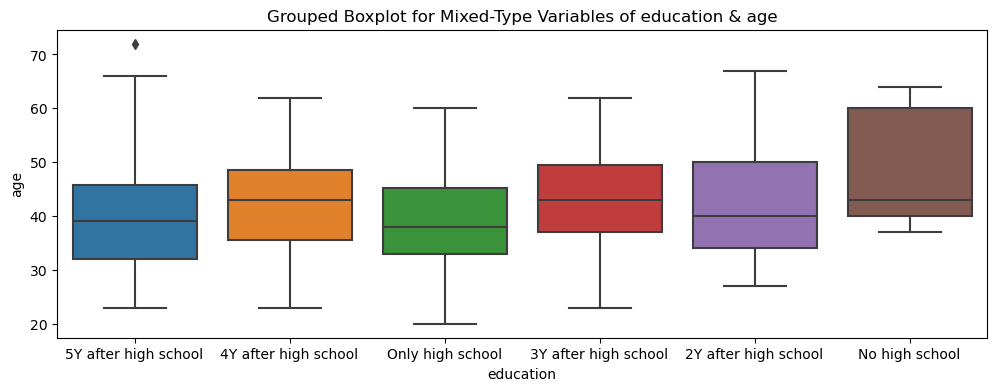

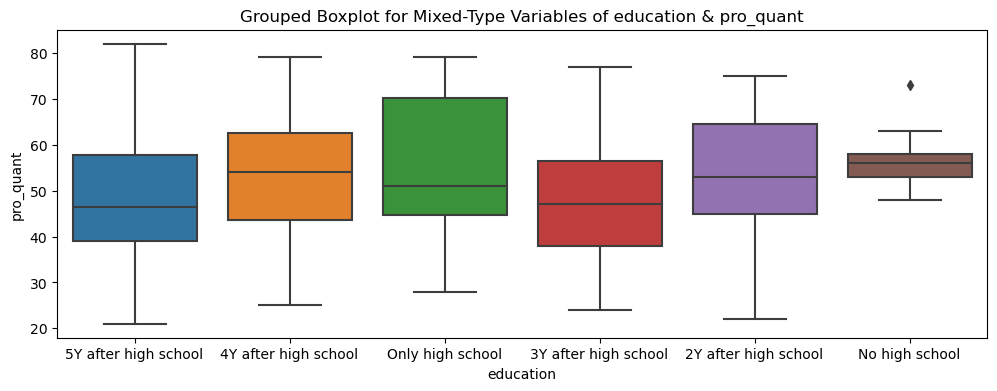

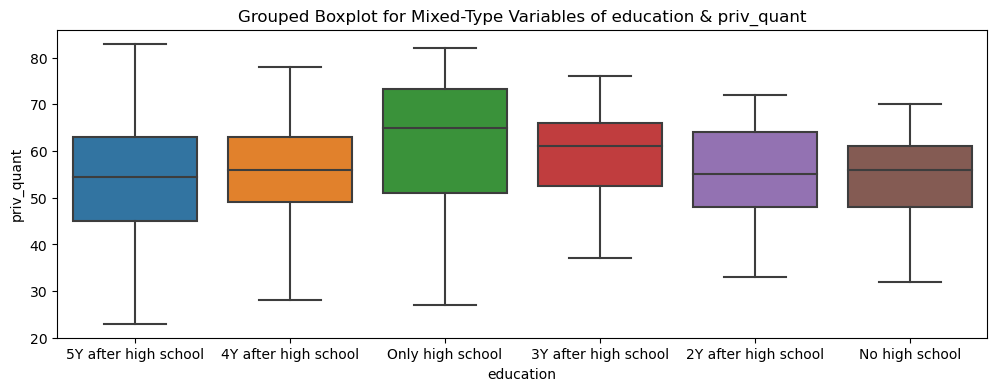

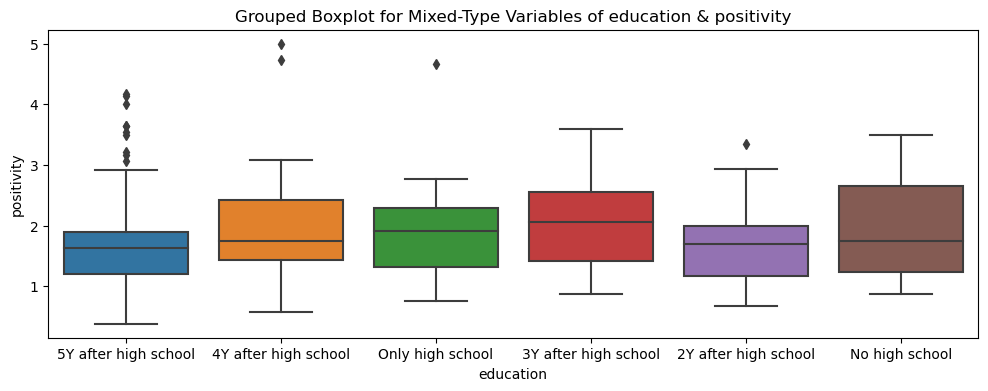

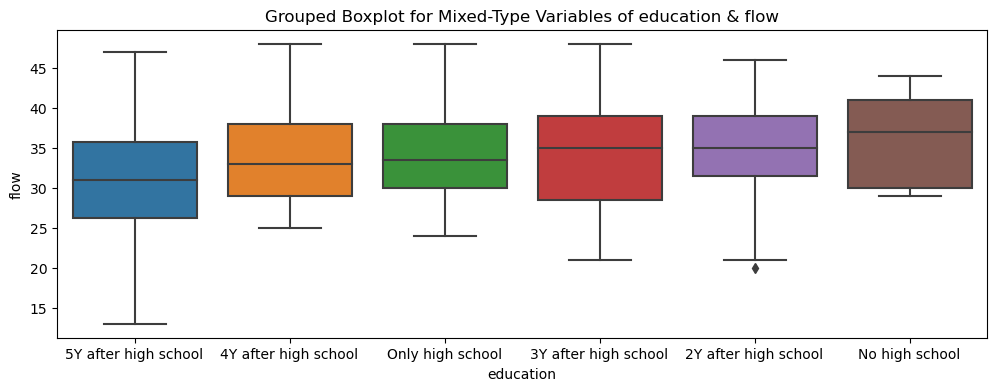

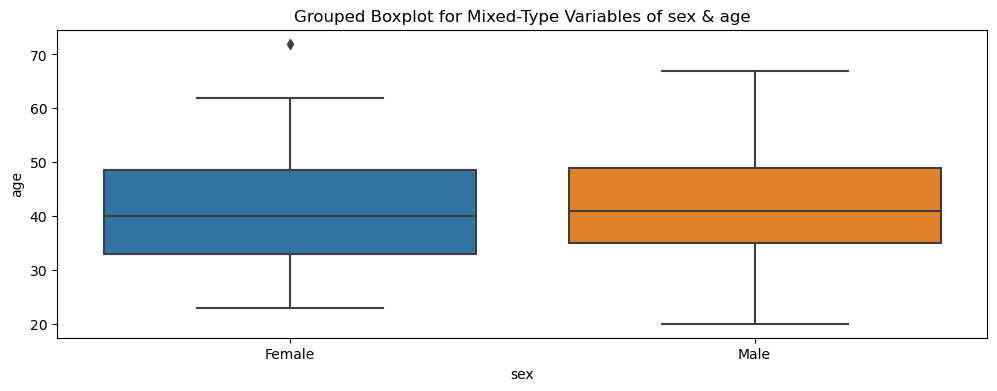

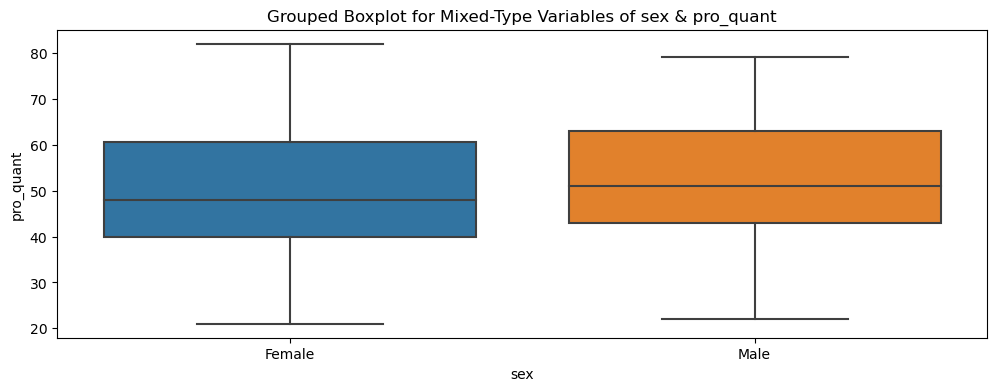

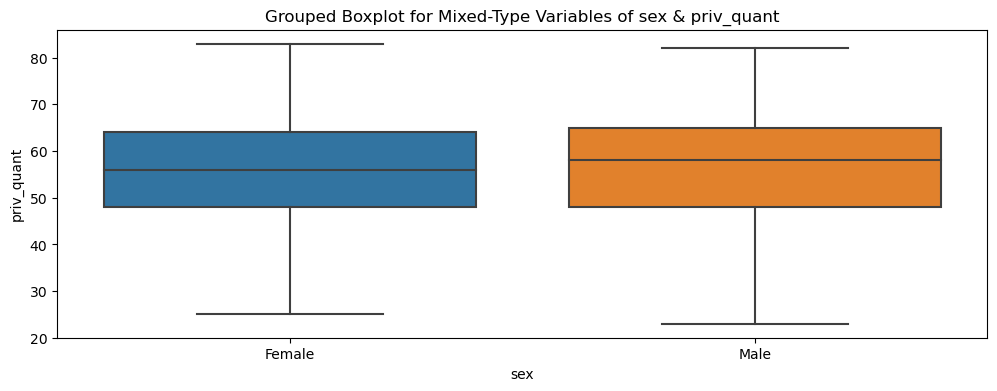

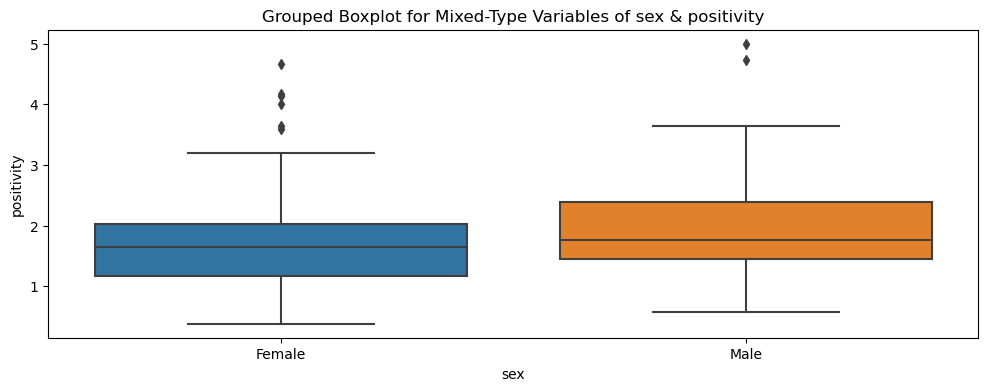

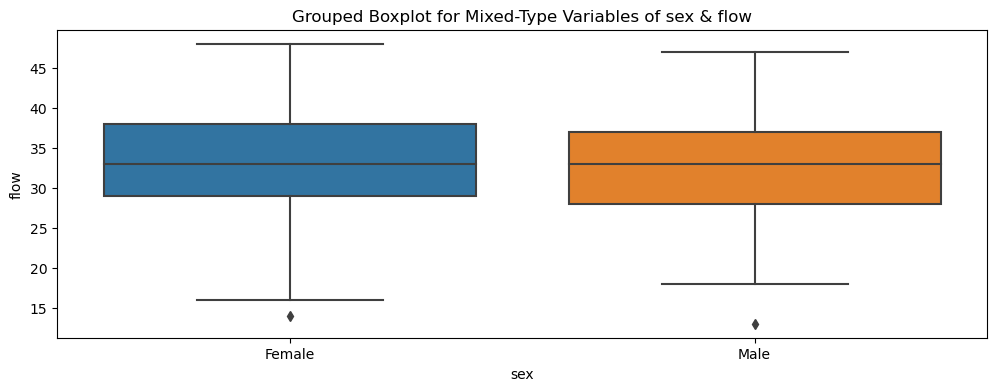

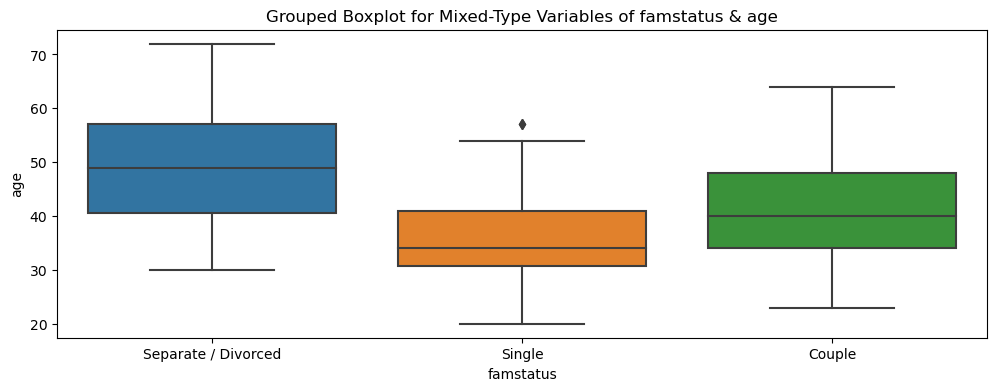

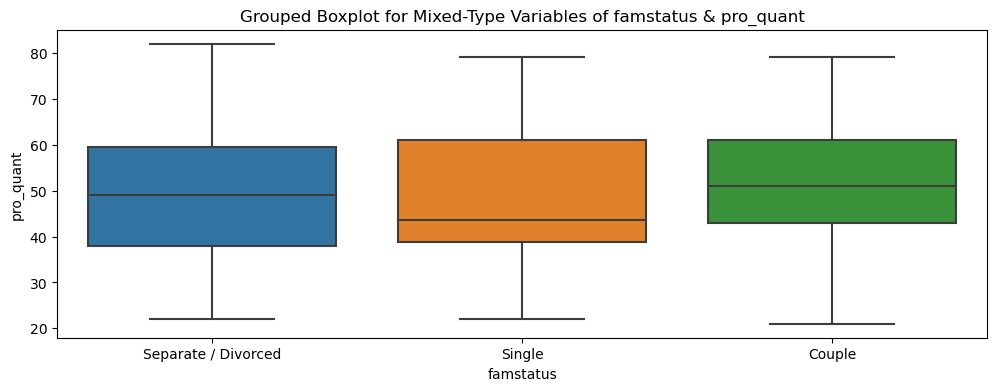

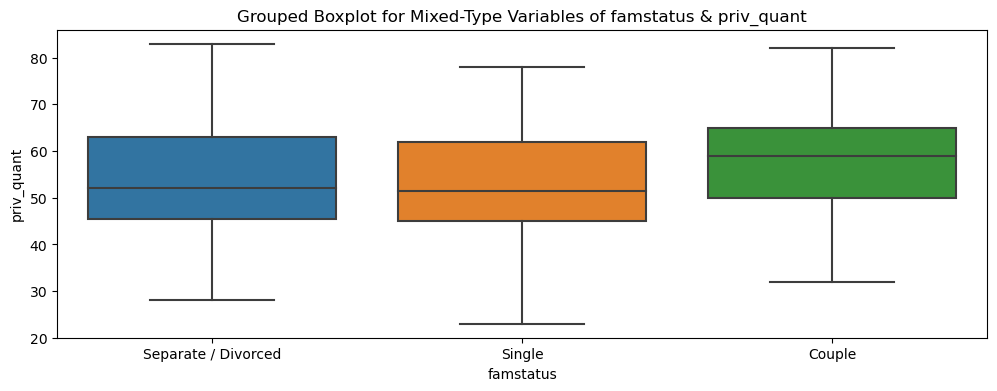

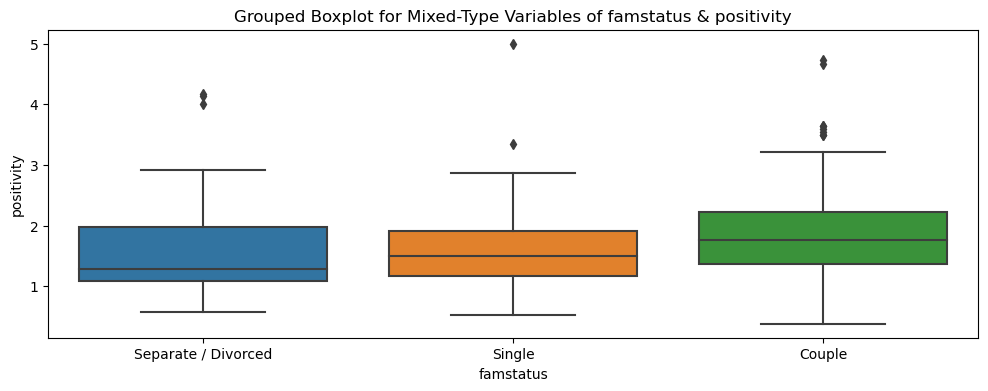

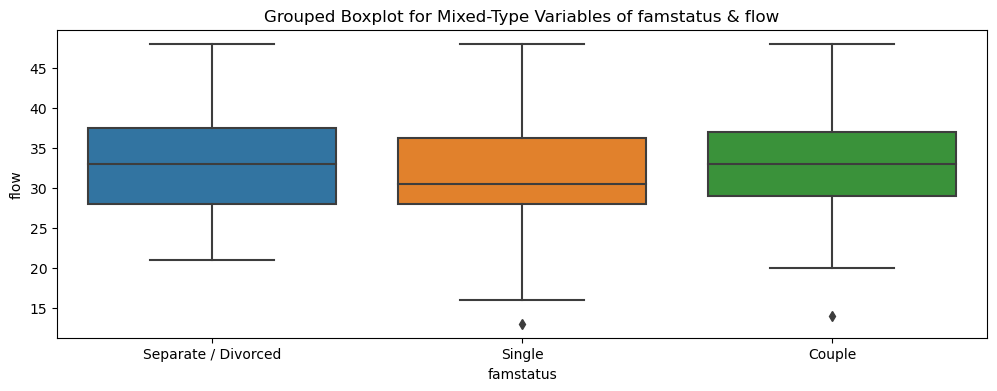

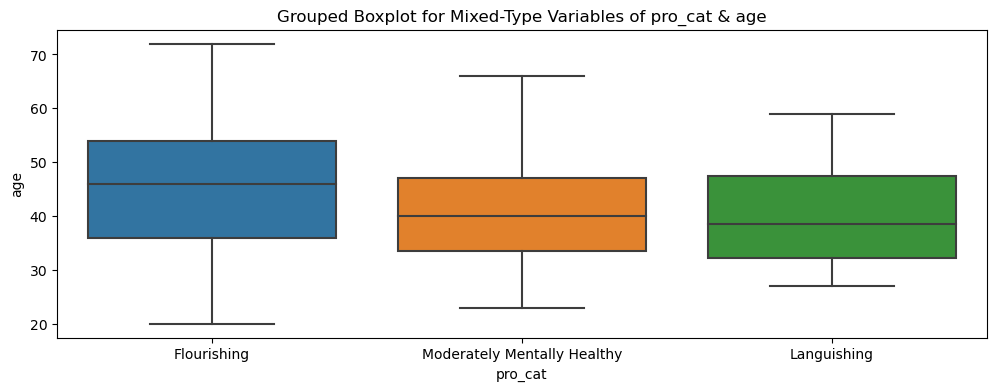

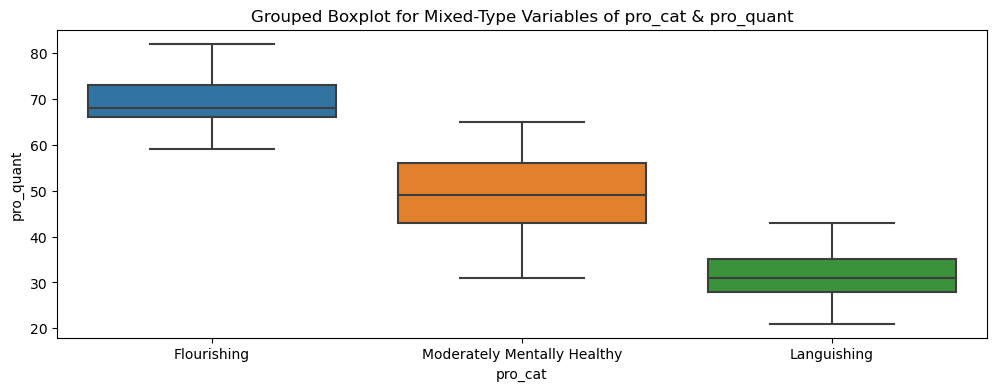

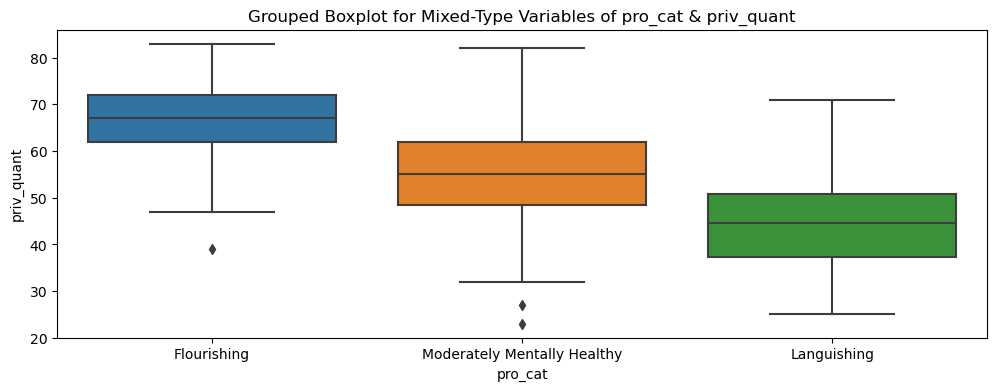

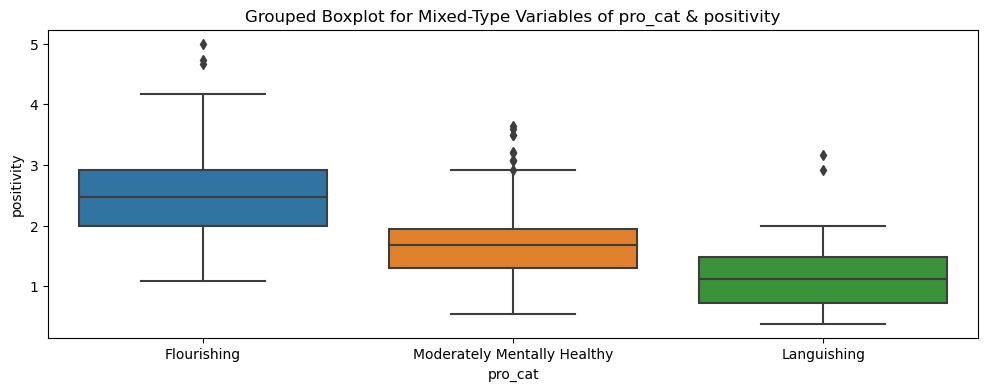

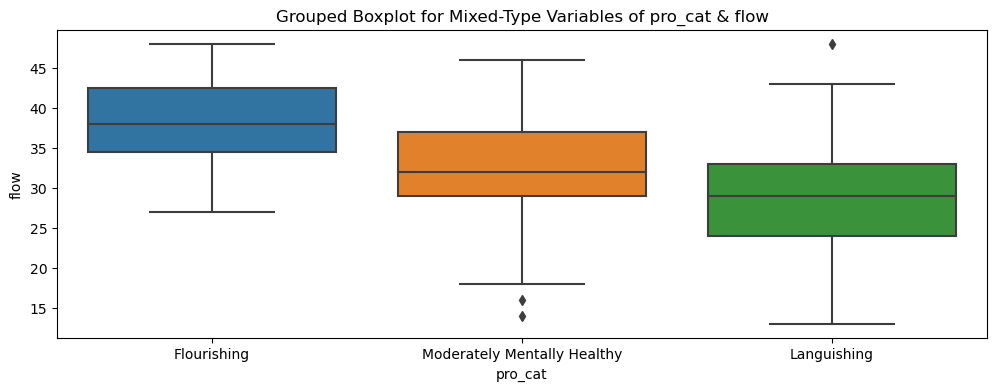

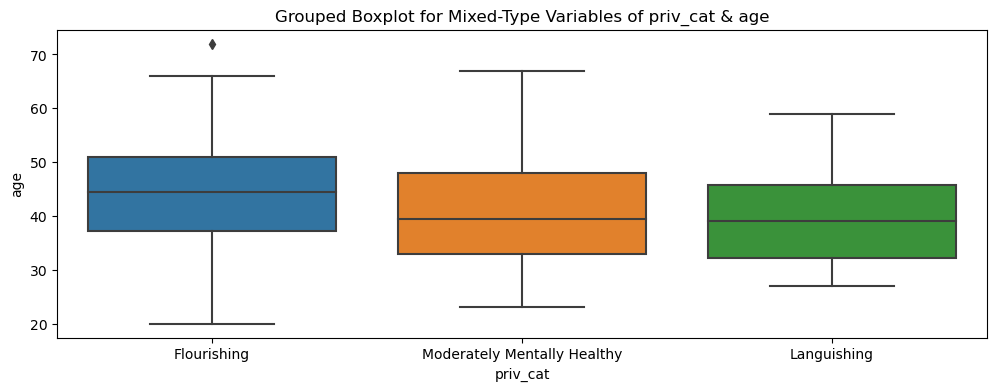

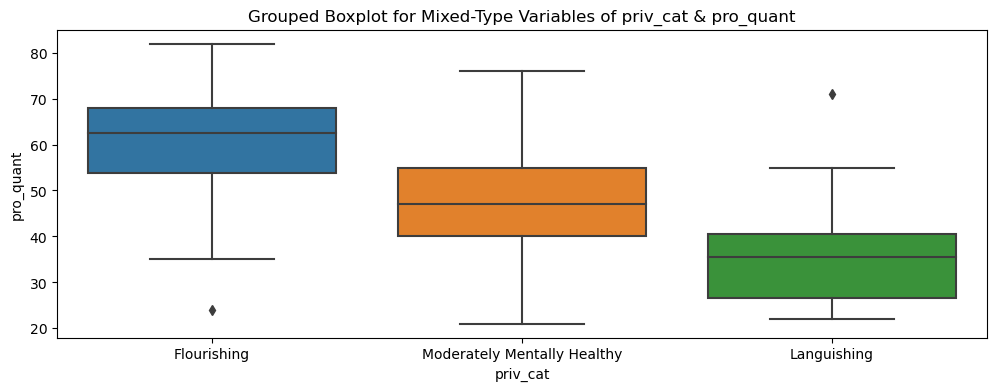

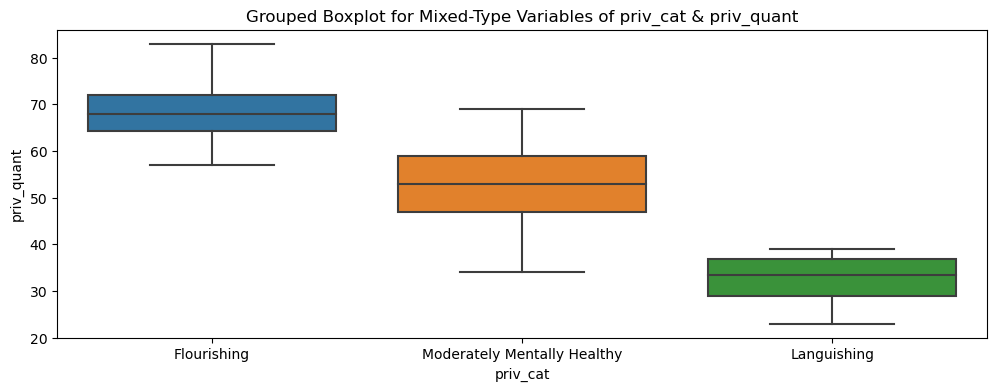

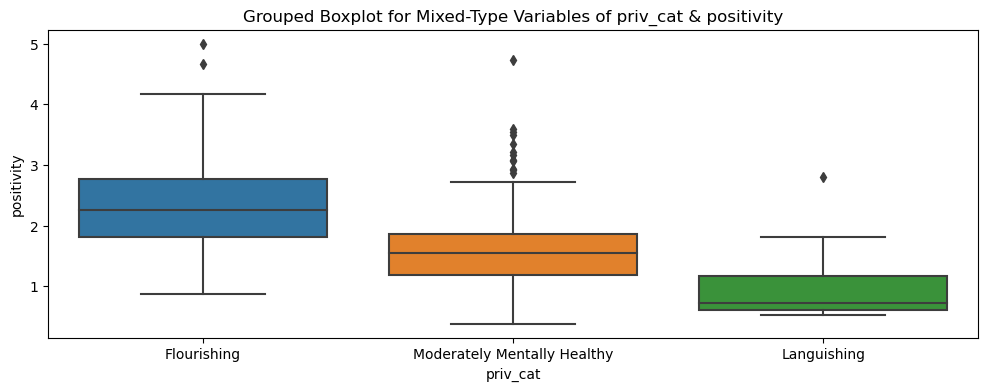

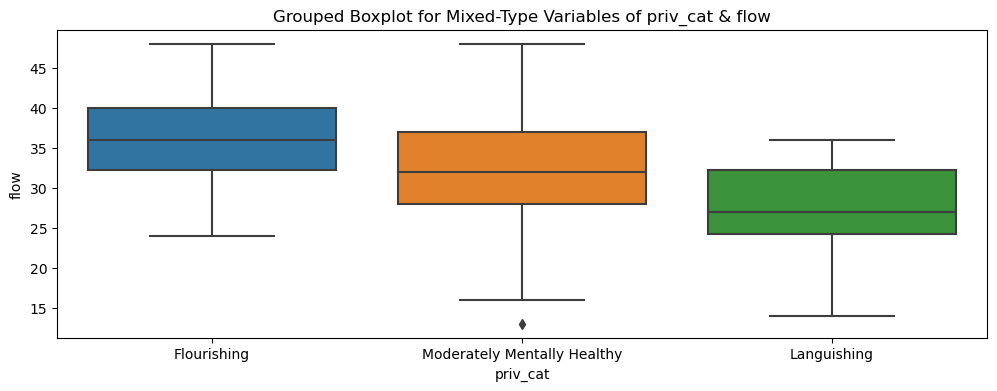

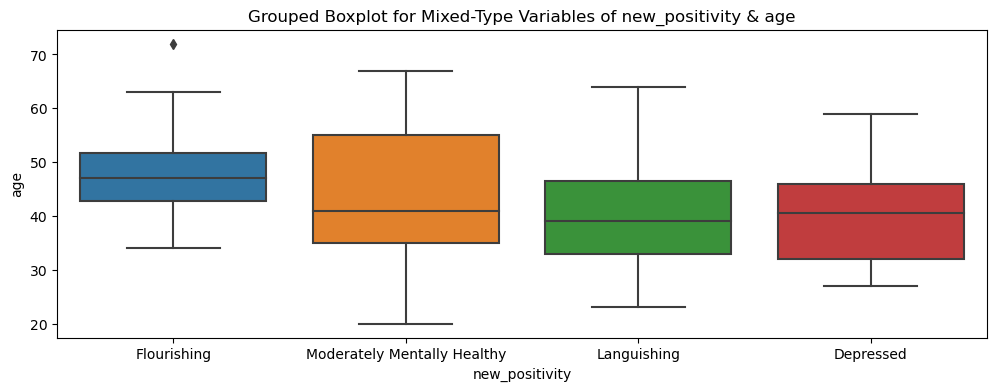

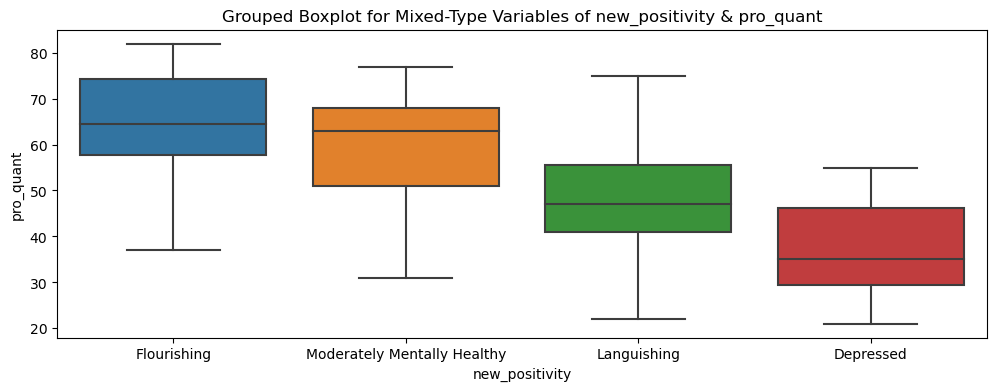

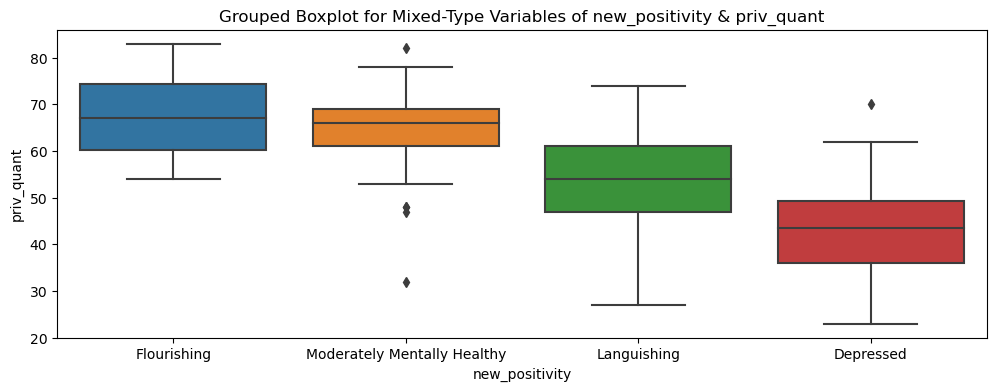

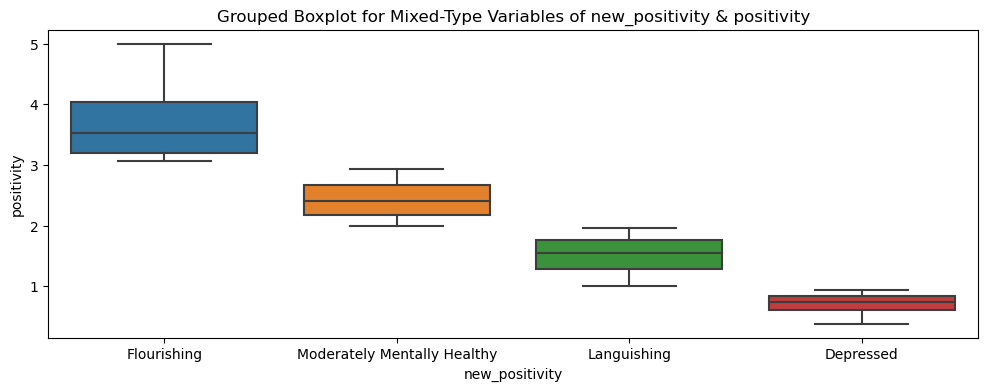

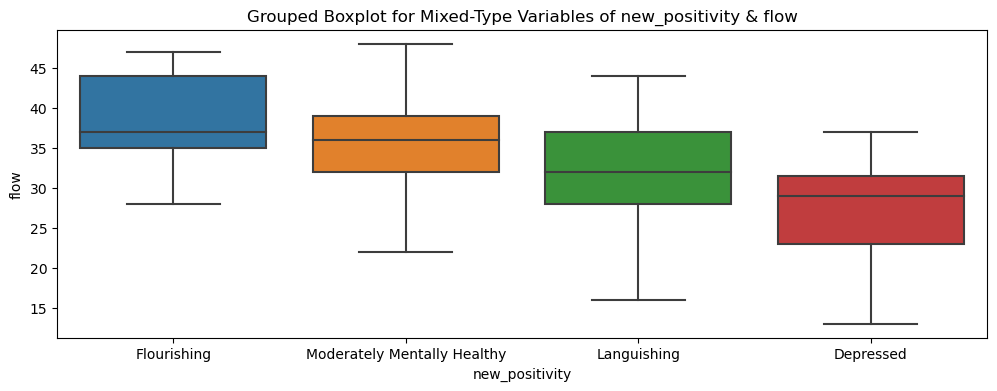

In [24]:
columns = df.columns

for i in (2,3,4,5,7,11):
    for j in (1,6,8,9,10):
        categorical_col = columns[i]
        quantitative_col = columns[j]

        plt.figure(figsize=(12, 4))
        sns.boxplot(x=categorical_col, y=quantitative_col, data=df
#                     , palette='Set3'
                   )
        plt.xlabel(categorical_col)
        plt.ylabel(quantitative_col)
        plt.title(f'Grouped Boxplot for Mixed-Type Variables of {categorical_col} & {quantitative_col}')
        plt.show()

- Question: 

- Which variables could be selected as outcome (target, response, dependent variable) or variable to be explained from the others? 

- Justify your suggestions with statistical & theoretical arguments.


The categorical variable I created, new_positivity should be the dependent variable.
Both from the Chi-square test and ANOVA analysis, we got the same conclusion that new_positivity is statistically significant linked with other categorical variables, the difference explained by quantitative variables is also statistically significant.


# Step 3 –  Modeling

Once you have selected an outcome among the variables of your dataset, the other variables become the predictors. Now the goal is to find a function that captures in the best possible way the relationships between the outcome and the predictors. This process is called “modeling” and statistical learning is one way of addressing it.

One goal of modeling is thus to explain the variability (or variance) in the outcome from the predictors. This approach to modeling is associated with “supervised learning” in statistical learning.

However, this variance may not be explained by the predictors only, i.e., by the relationship between the predictors and the outcome only. It may also be explained by the existence of subgroups of individual instances or subgroup heterogeneity. The process to account for these subgroups is associated with “unsupervised learning” in statistical learning.

On other occasions, the number of variables is too numerous, many of which are associated (correlated or linked) in various ways. In such cases, the relationships between the outcome and the predictors can become confusing, opaque or too complex. To reduce this complexity and to simplify interpretability, dimension reduction is recommended. The set of tools to reduce dimensions is also associated with “unsupervised learning” in statistical learning.

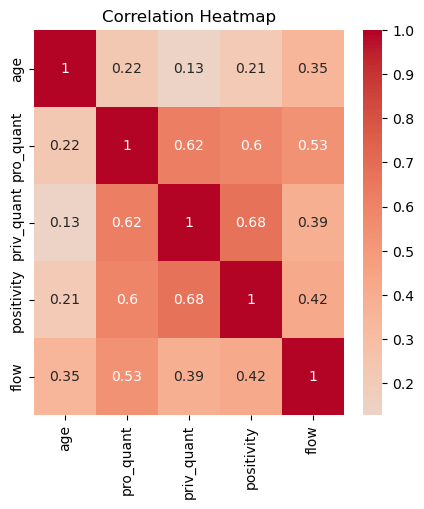


Since 'age', 'pro_quant', 'priv_quant', 'positivity' have similar correlation with 'flow', I keep them all in the linear regression model.



In [25]:
plt.figure(figsize=(5,5))
df_corr = df_qt.corr(method = 'spearman' )
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show() 
print("""
Since 'age', 'pro_quant', 'priv_quant', 'positivity' have similar correlation with 'flow', I keep them all in the linear regression model.
""")

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression,LogisticRegression

def res_table(linres,X,y):
    coef = np.append(linres.intercept_,linres.coef_)
    pred_names = np.append('intercept',X.columns)
    std_coef = linres.coef_ * np.std(X)/np.std(y)
    df_res = pd.DataFrame({'coefficients':coef, 'std_coeff':np.append(np.nan,std_coef)}, index=pred_names)
    return df_res.style.format({'coefficients':'{:.4f}' , 'std_coeff':'{:.4f}'})
def LR_performance(x,y):   
    lr = LinearRegression()
    lrs = lr.fit(x,y) 
    y_pred = lr.predict(x) 
    RMSE = np.sqrt(mean_squared_error(y, y_pred))
    rmse_per_mean = RMSE / np.mean(df_qt['flow']) 
    R_square = r2_score(y,y_pred) 
    n = x.shape[0] # number of rows
    p = x.shape[1] 
    R_square_adj = 1 - (n-1)*(1-R_square)/(n-p-1) 
    return lrs, RMSE, rmse_per_mean, R_square, R_square_adj
def lin_analyze(X,y):
    linres, RMSE,rmse_per_mean,R_square,R_square_adj = LR_performance(X,y)
    print(f'root mean squared error :{RMSE:.3f}')
    print(f'root mean squared error per sales mean :{rmse_per_mean:.3f}')
    print(f'R² = {R_square:.3f}')
    print(f'R²adjusted = {R_square_adj:.3f}')
    return res_table(linres,X,y)
X=df_qt[['age', 'pro_quant', 'priv_quant', 'positivity']]
y=df_qt['flow']
lin_analyze(X,y)

root mean squared error :5.249
root mean squared error per sales mean :0.159
R² = 0.365
R²adjusted = 0.354


,coefficients,std_coeff
intercept,13.3569,nan
age,0.1587,0.2442
pro_quant,0.1824,0.3713
priv_quant,0.0373,0.0657
positivity,0.9128,0.1111


In [27]:
X = pd.DataFrame({ 
                   'age':df_qt['age'],'pro_quant':df_qt['pro_quant'], 
                   'priv_quant':df_qt['priv_quant'], 
                   'positivity':df_qt['positivity'],
                   "age_positivity":df_qt['age']*df_qt['positivity'],
                   "pro_positivity":df_qt['pro_quant']*df_qt['positivity'],
                   "priv_positivity":df_qt['priv_quant']*df_qt['positivity']
                 }) 
y = df_qt['flow']
lin_analyze(X,y)  

root mean squared error :5.188
root mean squared error per sales mean :0.157
R² = 0.379
R²adjusted = 0.361


,coefficients,std_coeff
intercept,8.3292,nan
age,0.3255,0.5009
pro_quant,0.2540,0.5169
priv_quant,-0.0722,-0.1271
positivity,3.7124,0.4520
age_positivity,-0.0901,-0.6286
pro_positivity,-0.0430,-0.4189
priv_positivity,0.0627,0.6091


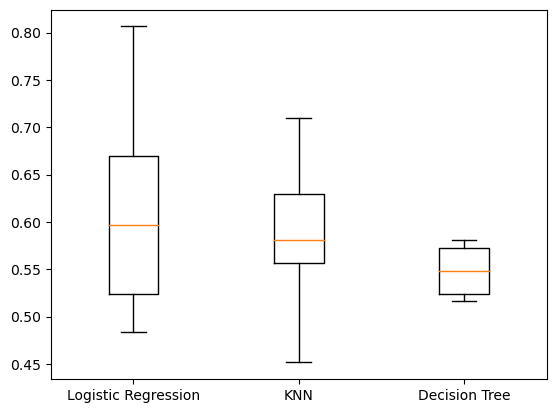

Logistic Regression Test Set Accuracy: 0.6129032258064516
KNN Test Set Accuracy: 0.6290322580645161
Decision Tree Test Set Accuracy: 0.5

From the results of three modeling, we found that Logistic Regression and KNN Test have similar accuracy, Diecision Tree doesn't perform good.



In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
X = pd.get_dummies(df.drop(columns=['new_positivity','ID','positivity'])).values
y = df['new_positivity'].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {"Logistic Regression": LogisticRegression(),"KNN": KNeighborsClassifier(),"Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))
print("""
From the results of three modeling, we found that Logistic Regression and KNN Test have similar accuracy, Diecision Tree doesn't perform good.
""")